In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

## z-scores for SNV density and singleton density, and overlap with various features (enhancers, exons, etc) 

Chen et al paper is at: 
https://github.com/quinlan-lab/constraint-tools/tree/main/literature/germline/chen%20et%20al%202022

I used the following notebook to merge the chen zscores with the mchale zscores computed on the Chen windows:
```
experiments/germline-model/chen-et-al-2022/merge_chen_zscores_with_mchale_zscores.ipynb
```

McHale zscores were computed using 3mers, 5mers, and 7mers: 

```
dist/model-germline-grch38.kmerSize-3.json
dist/model-germline-grch38.kmerSize-5.json
dist/model-germline-grch38.kmerSize-7.json
```

I used the following script to show that GeneHancer enhancers are non-overlapping: 
```
experiments/germline-model/chen-et-al-2022/GeneHancer-enhancers-dont-overlap.sh
```

I used the following script to compute the number of bps of each Chen window that is covered by each feature:
```
experiments/germline-model/chen-et-al-2022/add-overlapAmounts.sh
```

writing the data to
```
/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/benchmark-genome-wide-predictions/chen-et-al-2022/chen-mchale.multiple-kmers.overlapAmounts.bed
```


In [2]:
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'

In [3]:
import pandas as pd 

pd.set_option('display.max_rows', 30)

def get_chen_mchale_features():
    filename = f'{CONSTRAINT_TOOLS_DATA}/benchmark-genome-wide-predictions/chen-et-al-2022/chen-mchale.multiple-kmers.overlapAmounts.bed'
    df = pd.read_csv(filename, sep='\t')
    df = df.rename(columns = {
        'chen_zscore': 'chen zscore',
    })
    return df

chen_mchale_zscores_features = get_chen_mchale_features()
chen_mchale_zscores_features

chromosome     start       end  N_observed  K_observed    M   N_bar_3  \
0             chr1   1432000   1433000         260         110  257 -0.228060   
1             chr1   1435000   1436000         275         149  272 -7.687212   
2             chr1   1435000   1436000         275         149  272 -7.687212   
3             chr1   1435000   1436000         275         149  272 -7.687212   
4             chr1   1449000   1450000         225         113  223  0.374691   
...            ...       ...       ...         ...         ...  ...       ...   
2001165      chr22  50227000  50228000         281         121  281  1.095354   
2001166      chr22  50228000  50229000         240         120  228 -0.355943   
2001167      chr22  50228000  50229000         240         120  228 -0.355943   
2001168      chr22  50229000  50230000         231         121  231 -1.273488   
2001169      chr22  50236000  50237000         217         101  217 -1.027191   

                     K_bar_3   N_bar_5               K_bar_5   N_bar_7  \
0        -1.9172674540619583 -0.256142    -1.929171911173777 -0.302927   
1         1.0807428812243396 -7.120401    0.9862108436107184 -6.480015   
2         1.0807428812243396 -7.120401    0.9862108436107184 -6.480015   
3         1.0807428812243396 -7.120401    0.9862108436107184 -6.480015   
4        -0.4320220497782873  0.501916  -0.42349418060119715  0.375665   
...                      ...       ...                   ...       ...   
2001165  -1.7252944931979473  1.125435   -1.7555469423001422  1.186683   
2001166  0.10313490972853154 -0.393731   0.03005173712198986 -0.330440   
2001167  0.10313490972853154 -0.393731   0.03005173712198986 -0.330440   
2001168    0.075415864727681 -1.239444    0.0216509919812062 -1.182980   
2001169  -1.5223027104987945 -0.934605   -1.5879932634660578 -0.857339   

                      K_bar_7  chen zscore      feature feature_chromosome  \
0         -1.9542069179816122     2.384293     enhancer               chr1   
1          1.0063653866562718    -2.952197     enhancer               chr1   
2          1.0063653866562718    -2.952197  merged_exon               chr1   
3          1.0063653866562718    -2.952197  merged_exon               chr1   
4        -0.40292018202864255    -0.899126  merged_exon               chr1   
...                       ...          ...          ...                ...   
2001165   -1.8113689783770324    -2.528842  merged_exon              chr22   
2001166   0.09272271004257816     1.302929     enhancer              chr22   
2001167   0.09272271004257816     1.302929  merged_exon              chr22   
2001168  0.023455488221183544    -3.331737  merged_exon              chr22   
2001169    -1.590846662607307    -2.302320            .                  .   

         feature_start  feature_end  window_feature_overlap_bps  
0              1428218      1438733                        1000  
1              1428218      1438733                        1000  
2              1434861      1435146                         146  
3              1435523      1435821                         298  
4              1449689      1450758                         311  
...                ...          ...                         ...  
2001165       50227907     50228028                          93  
2001166       50228803     50228983                         180  
2001167       50227907     50228028                          28  
2001168       50229404     50229577                         173  
2001169             -1           -1                           0  

[2001170 rows x 18 columns]

## Assess how often windows are overlapped by multiple features of the same type

In [4]:
chen_mchale_zscores_features['feature'].unique()

array(['enhancer', 'merged_exon', '.', 'uncovered_region',
       'merged_encode_exclude_region', 'merged_gap'], dtype=object)

In [5]:
def show_windows_with_multiple_overlaps(feature): 
    df = chen_mchale_zscores_features
    df = df[df['feature'] == feature]
    print(f'Here are the windows that overlap multiple {feature}s:') 
    return df[df.duplicated(
            subset = ['chromosome', 'start'], 
            keep = False # Mark all duplicates as True.
    )]

show_windows_with_multiple_overlaps('enhancer')

Here are the windows that overlap multiple enhancers:


chromosome     start       end  N_observed  K_observed    M   N_bar_3  \
72            chr1   1542000   1543000         290         143  290 -0.096148   
73            chr1   1542000   1543000         290         143  290 -0.096148   
98            chr1   1576000   1577000         166          91  166 -3.566272   
99            chr1   1576000   1577000         166          91  166 -3.566272   
109           chr1   1598000   1599000         257         153  257 -1.535946   
...            ...       ...       ...         ...         ...  ...       ...   
2001097      chr22  50089000  50090000         234         131  234 -2.801202   
2001108      chr22  50102000  50103000         223         112  223  0.436215   
2001109      chr22  50102000  50103000         223         112  223  0.436215   
2001139      chr22  50140000  50141000         219         131  219  0.390936   
2001140      chr22  50140000  50141000         219         131  219  0.390936   

                      K_bar_3   N_bar_5               K_bar_5   N_bar_7  \
72       -0.15213253149567962  0.290686  -0.08913228394596494  0.274109   
73       -0.15213253149567962  0.290686  -0.08913228394596494  0.274109   
98        0.17204298392302092 -3.682082   0.13083724421992626 -3.743241   
99        0.17204298392302092 -3.682082   0.13083724421992626 -3.743241   
109         2.005641801143795 -1.353492    2.0618507921855267 -1.273968   
...                       ...       ...                   ...       ...   
2001097     1.006931354675202 -2.525259    0.9520074166465241 -2.379094   
2001108   -0.5448313707616435  0.600210  -0.48836695595008517  0.695360   
2001109   -0.5448313707616435  0.600210  -0.48836695595008517  0.695360   
2001139    1.7951008193327305  0.309596    1.7878916250226087  0.342215   
2001140    1.7951008193327305  0.309596    1.7878916250226087  0.342215   

                      K_bar_7  chen zscore   feature feature_chromosome  \
72       -0.22608601743246992    -2.630366  enhancer               chr1   
73       -0.22608601743246992    -2.630366  enhancer               chr1   
98        0.04515996617755827     1.340653  enhancer               chr1   
99        0.04515996617755827     1.340653  enhancer               chr1   
109        2.0414022656310724    -4.106163  enhancer               chr1   
...                       ...          ...       ...                ...   
2001097    0.8736467153003352     0.921774  enhancer              chr22   
2001108  -0.43240250426500443    -3.189693  enhancer              chr22   
2001109  -0.43240250426500443    -3.189693  enhancer              chr22   
2001139    1.8022705781780808    -1.781400  enhancer              chr22   
2001140    1.8022705781780808    -1.781400  enhancer              chr22   

         feature_start  feature_end  window_feature_overlap_bps  
72             1542001      1542200                         199  
73             1542870      1544200                         130  
98             1573000      1576201                         201  
99             1576221      1576370                         149  
109            1596901      1598401                         401  
...                ...          ...                         ...  
2001097       50089957     50090016                          43  
2001108       50102801     50104558                         199  
2001109       50101400     50102400                         400  
2001139       50139678     50140404                         404  
2001140       50140601     50141200                         399  

[80101 rows x 18 columns]

In [6]:
show_windows_with_multiple_overlaps('merged_exon')

Here are the windows that overlap multiple merged_exons:


chromosome     start       end  N_observed  K_observed    M   N_bar_3  \
2             chr1   1435000   1436000         275         149  272 -7.687212   
3             chr1   1435000   1436000         275         149  272 -7.687212   
24            chr1   1482000   1483000         358         142  358  4.393178   
25            chr1   1482000   1483000         358         142  358  4.393178   
27            chr1   1485000   1486000         394         152  394  6.429655   
...            ...       ...       ...         ...         ...  ...       ...   
2001161      chr22  50224000  50225000         254         137  254  0.514023   
2001162      chr22  50224000  50225000         254         137  254  0.514023   
2001163      chr22  50224000  50225000         254         137  254  0.514023   
2001164      chr22  50227000  50228000         281         121  281  1.095354   
2001165      chr22  50227000  50228000         281         121  281  1.095354   

                     K_bar_3   N_bar_5              K_bar_5   N_bar_7  \
2         1.0807428812243396 -7.120401   0.9862108436107184 -6.480015   
3         1.0807428812243396 -7.120401   0.9862108436107184 -6.480015   
24        -2.238738039510389  4.884083  -2.1201245809422686  5.199109   
25        -2.238738039510389  4.884083  -2.1201245809422686  5.199109   
27       -2.7191269888246365  6.768256  -2.6900079069615703  6.981240   
...                      ...       ...                  ...       ...   
2001161   0.6934577364788537  0.537595   0.6821584879264039  0.613568   
2001162   0.6934577364788537  0.537595   0.6821584879264039  0.613568   
2001163   0.6934577364788537  0.537595   0.6821584879264039  0.613568   
2001164  -1.7252944931979473  1.125435  -1.7555469423001422  1.186683   
2001165  -1.7252944931979473  1.125435  -1.7555469423001422  1.186683   

                     K_bar_7  chen zscore      feature feature_chromosome  \
2         1.0063653866562718    -2.952197  merged_exon               chr1   
3         1.0063653866562718    -2.952197  merged_exon               chr1   
24        -2.321329114225284    -4.437469  merged_exon               chr1   
25        -2.321329114225284    -4.437469  merged_exon               chr1   
27        -2.728200380861117    -3.973097  merged_exon               chr1   
...                      ...          ...          ...                ...   
2001161   0.7110962532414574    -5.828498  merged_exon              chr22   
2001162   0.7110962532414574    -5.828498  merged_exon              chr22   
2001163   0.7110962532414574    -5.828498  merged_exon              chr22   
2001164  -1.8113689783770324    -2.528842  merged_exon              chr22   
2001165  -1.8113689783770324    -2.528842  merged_exon              chr22   

         feature_start  feature_end  window_feature_overlap_bps  
2              1434861      1435146                         146  
3              1435523      1435821                         298  
24             1482138      1482303                         165  
25             1482545      1482662                         117  
27             1483485      1485171                         171  
...                ...          ...                         ...  
2001161       50222987     50224256                         256  
2001162       50224332     50224420                          88  
2001163       50224511     50224592                          81  
2001164       50226999     50227077                          77  
2001165       50227907     50228028                          93  

[79636 rows x 18 columns]

## Create single record for each window, with overlap amounts for each feature type 

In [7]:
chen_mchale_zscores_features = chen_mchale_zscores_features.drop(['feature_chromosome', 'feature_start', 'feature_end'], axis=1)
chen_mchale_zscores_features

chromosome     start       end  N_observed  K_observed    M   N_bar_3  \
0             chr1   1432000   1433000         260         110  257 -0.228060   
1             chr1   1435000   1436000         275         149  272 -7.687212   
2             chr1   1435000   1436000         275         149  272 -7.687212   
3             chr1   1435000   1436000         275         149  272 -7.687212   
4             chr1   1449000   1450000         225         113  223  0.374691   
...            ...       ...       ...         ...         ...  ...       ...   
2001165      chr22  50227000  50228000         281         121  281  1.095354   
2001166      chr22  50228000  50229000         240         120  228 -0.355943   
2001167      chr22  50228000  50229000         240         120  228 -0.355943   
2001168      chr22  50229000  50230000         231         121  231 -1.273488   
2001169      chr22  50236000  50237000         217         101  217 -1.027191   

                     K_bar_3   N_bar_5               K_bar_5   N_bar_7  \
0        -1.9172674540619583 -0.256142    -1.929171911173777 -0.302927   
1         1.0807428812243396 -7.120401    0.9862108436107184 -6.480015   
2         1.0807428812243396 -7.120401    0.9862108436107184 -6.480015   
3         1.0807428812243396 -7.120401    0.9862108436107184 -6.480015   
4        -0.4320220497782873  0.501916  -0.42349418060119715  0.375665   
...                      ...       ...                   ...       ...   
2001165  -1.7252944931979473  1.125435   -1.7555469423001422  1.186683   
2001166  0.10313490972853154 -0.393731   0.03005173712198986 -0.330440   
2001167  0.10313490972853154 -0.393731   0.03005173712198986 -0.330440   
2001168    0.075415864727681 -1.239444    0.0216509919812062 -1.182980   
2001169  -1.5223027104987945 -0.934605   -1.5879932634660578 -0.857339   

                      K_bar_7  chen zscore      feature  \
0         -1.9542069179816122     2.384293     enhancer   
1          1.0063653866562718    -2.952197     enhancer   
2          1.0063653866562718    -2.952197  merged_exon   
3          1.0063653866562718    -2.952197  merged_exon   
4        -0.40292018202864255    -0.899126  merged_exon   
...                       ...          ...          ...   
2001165   -1.8113689783770324    -2.528842  merged_exon   
2001166   0.09272271004257816     1.302929     enhancer   
2001167   0.09272271004257816     1.302929  merged_exon   
2001168  0.023455488221183544    -3.331737  merged_exon   
2001169    -1.590846662607307    -2.302320            .   

         window_feature_overlap_bps  
0                              1000  
1                              1000  
2                               146  
3                               298  
4                               311  
...                             ...  
2001165                          93  
2001166                         180  
2001167                          28  
2001168                         173  
2001169                           0  

[2001170 rows x 15 columns]

In [8]:
columns_to_group_by = [column for column in chen_mchale_zscores_features.columns if column != 'window_feature_overlap_bps']
columns_to_group_by

['chromosome',
 'start',
 'end',
 'N_observed',
 'K_observed',
 'M',
 'N_bar_3',
 'K_bar_3',
 'N_bar_5',
 'K_bar_5',
 'N_bar_7',
 'K_bar_7',
 'chen zscore',
 'feature']

In [9]:
chen_mchale_zscores_features = ( 
    chen_mchale_zscores_features
    .groupby(columns_to_group_by)
    .agg({'window_feature_overlap_bps': 'sum'})
)
chen_mchale_zscores_features

window_feature_overlap_bps
chromosome start     end       N_observed K_observed M   N_bar_3   K_bar_3             N_bar_5   K_bar_5              N_bar_7   K_bar_7              chen zscore feature                                
chr1       1432000   1433000   260        110        257 -0.228060 -1.9172674540619583 -0.256142 -1.929171911173777   -0.302927 -1.9542069179816122   2.384293   enhancer                           1000
           1435000   1436000   275        149        272 -7.687212 1.0807428812243396  -7.120401 0.9862108436107184   -6.480015 1.0063653866562718   -2.952197   enhancer                           1000
                                                                                                                                                                 merged_exon                         444
           1449000   1450000   225        113        223  0.374691 -0.4320220497782873  0.501916 -0.42349418060119715  0.375665 -0.40292018202864255 -0.899126   merged_exon                         311
           1450000   1451000   313        109        308  2.210181 -3.541284444033647   2.499685 -3.446256072892112    2.604670 -3.4160133802925     -5.461776   merged_exon                         758
...                                                                                                                                                                                                  ...
chr9       137282000 137283000 211        108        211 -1.847620 -0.4099633025793188 -1.660706 -0.41111762944369107 -1.537782 -0.33350277418097046 -1.325061   enhancer                            572
                                                                                                                                                                 merged_exon                         641
           137290000 137291000 224        106        224 -0.617396 -1.245815646115184  -0.406692 -1.2422470161288288  -0.097785 -1.182282731197813    2.257853   .                                     0
           137294000 137295000 182        92         182 -5.674120 -0.7692838549315356 -5.499267 -0.6936600411939128  -5.355165 -0.7747279659290897   2.594305   enhancer                           1000
                                                                                                                                                                 merged_exon                        1000

[1917155 rows x 1 columns]

In [10]:
pivot_index = [column for column in columns_to_group_by if column != 'feature']
pivot_index 

['chromosome',
 'start',
 'end',
 'N_observed',
 'K_observed',
 'M',
 'N_bar_3',
 'K_bar_3',
 'N_bar_5',
 'K_bar_5',
 'N_bar_7',
 'K_bar_7',
 'chen zscore']

In [11]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-by-pivoting-dataframe-objects
# pivoting is possible in SQL too, but it is clunky: https://www.databricks.com/blog/2018/11/01/sql-pivot-converting-rows-to-columns.html
chen_mchale_zscores_features = (
    chen_mchale_zscores_features
    .reset_index()
    .pivot(
        index = pivot_index, 
        columns = "feature", 
        values = "window_feature_overlap_bps"
    )
    .drop(['.'], axis=1)
    .add_suffix(' overlap')
    .reset_index()
)
chen_mchale_zscores_features.columns.name = None
chen_mchale_zscores_features

chromosome      start        end  N_observed  K_observed    M  \
0             chr1    1432000    1433000         260         110  257   
1             chr1    1435000    1436000         275         149  272   
2             chr1    1449000    1450000         225         113  223   
3             chr1    1450000    1451000         313         109  308   
4             chr1    1451000    1452000         291         129  291   
...            ...        ...        ...         ...         ...  ...   
1796995       chr9  137269000  137270000         210         104  210   
1796996       chr9  137275000  137276000         295         118  295   
1796997       chr9  137282000  137283000         211         108  211   
1796998       chr9  137290000  137291000         224         106  224   
1796999       chr9  137294000  137295000         182          92  182   

          N_bar_3              K_bar_3   N_bar_5               K_bar_5  \
0       -0.228060  -1.9172674540619583 -0.256142    -1.929171911173777   
1       -7.687212   1.0807428812243396 -7.120401    0.9862108436107184   
2        0.374691  -0.4320220497782873  0.501916  -0.42349418060119715   
3        2.210181   -3.541284444033647  2.499685    -3.446256072892112   
4        2.257523  -1.3744872898308813  2.673875   -1.3290694510065333   
...           ...                  ...       ...                   ...   
1796995 -3.344501  -0.8454385153150719 -3.190151    -0.789061608844871   
1796996  1.945852  -2.4839877706412383  1.850597     -2.30844916422604   
1796997 -1.847620  -0.4099633025793188 -1.660706  -0.41111762944369107   
1796998 -0.617396   -1.245815646115184 -0.406692   -1.2422470161288288   
1796999 -5.674120  -0.7692838549315356 -5.499267   -0.6936600411939128   

          N_bar_7               K_bar_7  chen zscore  enhancer overlap  \
0       -0.302927   -1.9542069179816122     2.384293            1000.0   
1       -6.480015    1.0063653866562718    -2.952197            1000.0   
2        0.375665  -0.40292018202864255    -0.899126               NaN   
3        2.604670      -3.4160133802925    -5.461776               NaN   
4        2.948512   -1.3173308655803435    -1.497436               NaN   
...           ...                   ...          ...               ...   
1796995 -2.991450   -0.7858373648267517    -2.101905            1000.0   
1796996  1.895573   -2.4094675113595323    -8.124844             712.0   
1796997 -1.537782  -0.33350277418097046    -1.325061             572.0   
1796998 -0.097785    -1.182282731197813     2.257853               NaN   
1796999 -5.355165   -0.7747279659290897     2.594305            1000.0   

         merged_encode_exclude_region overlap  merged_exon overlap  \
0                                         NaN                  NaN   
1                                         NaN                444.0   
2                                         NaN                311.0   
3                                         NaN                758.0   
4                                         NaN                  NaN   
...                                       ...                  ...   
1796995                                   NaN                  NaN   
1796996                                   NaN                  NaN   
1796997                                   NaN                641.0   
1796998                                   NaN                  NaN   
1796999                                   NaN               1000.0   

         merged_gap overlap  uncovered_region overlap  
0                       NaN                       NaN  
1                       NaN                       NaN  
2                       NaN                       NaN  
3                       NaN                       NaN  
4                       NaN                       NaN  
...                     ...                       ...  
1796995                 NaN                       NaN  
1796996                 NaN                       NaN  
1796997 

In [12]:
# Note: the groupby followed by pivot strategy, implemented above,
# could be achieved in one step using pivot tables: 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#pivoting-with-single-aggregations

In [13]:
for kmer_size in [3, 5, 7]:
    chen_mchale_zscores_features[f'K_bar_{kmer_size}'] = pd.to_numeric(chen_mchale_zscores_features[f'K_bar_{kmer_size}'], errors='coerce') # convert '.' to 'NaN'
    chen_mchale_zscores_features = chen_mchale_zscores_features.dropna(subset=[f'K_bar_{kmer_size}']) # drop windows for which K_bar_X == NaN
chen_mchale_zscores_features.describe()

<ipython-input-13-da0fd30174b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chen_mchale_zscores_features[f'K_bar_{kmer_size}'] = pd.to_numeric(chen_mchale_zscores_features[f'K_bar_{kmer_size}'], errors='coerce') # convert '.' to 'NaN'


start           end    N_observed    K_observed             M  \
count  1.794890e+06  1.794890e+06  1.794890e+06  1.794890e+06  1.794890e+06   
mean   8.148108e+07  8.148208e+07  2.015531e+02  1.059649e+02  2.005317e+02   
std    5.514385e+07  5.514385e+07  3.163578e+01  1.665329e+01  3.134257e+01   
min    5.220000e+05  5.230000e+05  1.280000e+02  5.000000e+01  1.280000e+02   
25%    3.657100e+07  3.657200e+07  1.810000e+02  9.500000e+01  1.800000e+02   
50%    7.262800e+07  7.262900e+07  1.970000e+02  1.040000e+02  1.960000e+02   
75%    1.161320e+08  1.161330e+08  2.150000e+02  1.140000e+02  2.140000e+02   
max    2.484140e+08  2.484150e+08  5.590000e+02  2.380000e+02  4.230000e+02   

            N_bar_3       K_bar_3       N_bar_5       K_bar_5       N_bar_7  \
count  1.794890e+06  1.794890e+06  1.794890e+06  1.794890e+06  1.794890e+06   
mean  -2.077399e-01 -1.793377e-02 -2.086821e-01 -1.837687e-02 -2.106507e-01   
std    2.305167e+00  9.927390e-01  2.299766e+00  9.927215e-01  2.282162e+00   
min   -1.809390e+01 -5.292387e+00 -1.755049e+01 -5.224782e+00 -1.692947e+01   
25%   -1.657117e+00 -6.790830e-01 -1.658327e+00 -6.791469e-01 -1.651127e+00   
50%   -5.108906e-01 -4.475480e-03 -5.159506e-01 -9.065411e-03 -5.189603e-01   
75%    8.351058e-01  6.586510e-01  8.280115e-01  6.545009e-01  8.125715e-01   
max    2.481961e+01  4.533034e+00  2.445698e+01  4.535001e+00  2.372282e+01   

            K_bar_7   chen zscore  enhancer overlap  \
count  1.794890e+06  1.794890e+06     596160.000000   
mean  -1.852511e-02 -5.928738e-01        679.389162   
std    9.928025e-01  2.113652e+00        326.460491   
min   -5.220967e+00 -9.999583e+00          0.000000   
25%   -6.806389e-01 -1.755740e+00        399.000000   
50%   -9.179449e-03 -4.505154e-01        798.000000   
75%    6.597655e-01  7.593275e-01       1000.000000   
max    4.590955e+00  9.924837e+00       1000.000000   

       merged_encode_exclude_region overlap  merged_exon overlap  \
count                            570.000000        259747.000000   
mean                             298.335088           377.446411   
std                              157.761143           331.937272   
min                                1.000000             1.000000   
25%                              173.250000           115.000000   
50%                              345.500000           233.000000   
75%                              384.000000           596.000000   
max                              652.000000          1000.000000   

       merged_gap overlap  uncovered_region overlap  
count                 1.0               3996.000000  
mean                304.0                 71.700701  
std                   NaN                 52.848233  
min                 304.0                  1.000000  
25%                 304.0                 43.000000  
50%                 304.0                 60.000000  
75%                 304.0                 88.000000  
max                 304.0                563.000000

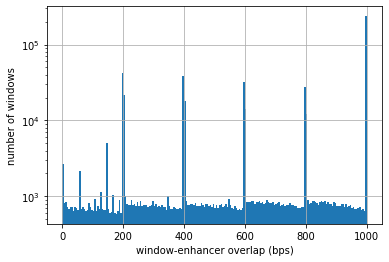

In [14]:
import numpy as np 

def plot_distribution_of_overlap_amounts(feature): 
    axis = chen_mchale_zscores_features[f'{feature} overlap'].hist(bins=200)
    axis.set_yscale('log')
    axis.set_xlabel(f'window-{feature} overlap (bps)')
    axis.set_ylabel('number of windows')
    
# Notice that there are peaks in the distribution at multiples of 200bp.
# These correspond to starts and ends of certain enhancers, 
# presumably those called from a low-resolution tiling approach.
# The other category of enhancer has greater spatial resolution, 
# resulting in a uniform distribution of bp coverage, 
# as you might expect from features that are comparable in size to the windows 
plot_distribution_of_overlap_amounts(feature='enhancer')

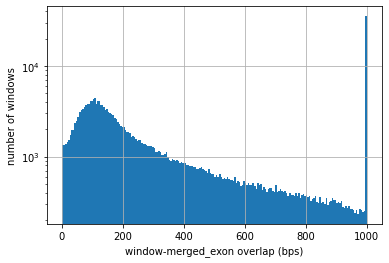

In [15]:
# Notice that the distribution is not uniform. 
# This is because exons are typically smaller than windows, 
# so that the overlap amounts reflect the exon sizes, 
# which are typically < 200bp 
plot_distribution_of_overlap_amounts(feature='merged_exon')

## Throw out non-trustworthy windows, and classify the remainder according to whether they appreciably overlap enhancers or exons 

In [16]:
def classify(df, feature, min_overlap): 
    def overlaps_enhancer(overlap): 
        if pd.isna(overlap): 
            return False
        if overlap > min_overlap: 
            return True 
        return 'ambiguous'

    df[f'window overlaps {feature}'] = df[f'{feature} overlap'].apply(overlaps_enhancer)
    return df
    
def classify_all(df): 
    for feature, min_overlap in [
        ('enhancer', 10),
        ('merged_encode_exclude_region', 0),
        ('merged_exon', 5),
        ('merged_gap', 0),
        ('uncovered_region', 0),
    ]:
        df = classify(df, feature, min_overlap)
    return df 

pd.set_option('display.max_columns', 30)

chen_mchale_zscores_features = classify_all(chen_mchale_zscores_features)
chen_mchale_zscores_features 

chromosome      start        end  N_observed  K_observed    M  \
0             chr1    1432000    1433000         260         110  257   
1             chr1    1435000    1436000         275         149  272   
2             chr1    1449000    1450000         225         113  223   
3             chr1    1450000    1451000         313         109  308   
4             chr1    1451000    1452000         291         129  291   
...            ...        ...        ...         ...         ...  ...   
1796995       chr9  137269000  137270000         210         104  210   
1796996       chr9  137275000  137276000         295         118  295   
1796997       chr9  137282000  137283000         211         108  211   
1796998       chr9  137290000  137291000         224         106  224   
1796999       chr9  137294000  137295000         182          92  182   

          N_bar_3   K_bar_3   N_bar_5   K_bar_5   N_bar_7   K_bar_7  \
0       -0.228060 -1.917267 -0.256142 -1.929172 -0.302927 -1.954207   
1       -7.687212  1.080743 -7.120401  0.986211 -6.480015  1.006365   
2        0.374691 -0.432022  0.501916 -0.423494  0.375665 -0.402920   
3        2.210181 -3.541284  2.499685 -3.446256  2.604670 -3.416013   
4        2.257523 -1.374487  2.673875 -1.329069  2.948512 -1.317331   
...           ...       ...       ...       ...       ...       ...   
1796995 -3.344501 -0.845439 -3.190151 -0.789062 -2.991450 -0.785837   
1796996  1.945852 -2.483988  1.850597 -2.308449  1.895573 -2.409468   
1796997 -1.847620 -0.409963 -1.660706 -0.411118 -1.537782 -0.333503   
1796998 -0.617396 -1.245816 -0.406692 -1.242247 -0.097785 -1.182283   
1796999 -5.674120 -0.769284 -5.499267 -0.693660 -5.355165 -0.774728   

         chen zscore  enhancer overlap  merged_encode_exclude_region overlap  \
0           2.384293            1000.0                                   NaN   
1          -2.952197            1000.0                                   NaN   
2          -0.899126               NaN                                   NaN   
3          -5.461776               NaN                                   NaN   
4          -1.497436               NaN                                   NaN   
...              ...               ...                                   ...   
1796995    -2.101905            1000.0                                   NaN   
1796996    -8.124844             712.0                                   NaN   
1796997    -1.325061             572.0                                   NaN   
1796998     2.257853               NaN                                   NaN   
1796999     2.594305            1000.0                                   NaN   

         merged_exon overlap  merged_gap overlap  uncovered_region overlap  \
0                        NaN                 NaN                       NaN   
1                      444.0                 NaN                       NaN   
2                      311.0                 NaN                       NaN   
3                      758.0                 NaN                       NaN   
4                        NaN                 NaN                       NaN   
...                      ...                 ...                       ...   
1796995                  NaN                 NaN                       NaN   
1796996                  NaN                 NaN                       NaN   
1796997                641.0                 NaN                       NaN   
1796998                  NaN                 NaN                       NaN   
1796999               1000.0                 NaN                       NaN   

        window overlaps enhancer  \
0                           True   
1                           True   
2                          False   
3                          False   
4                          False   
...                          ...   
1796995                     True   
1796996                     True   
1796997                     True   
1796998             

In [17]:
def throw_out_untrustworthy(df): 
    throw_out = df[[
        'window overlaps merged_encode_exclude_region',
        'window overlaps merged_gap',
        'window overlaps uncovered_region'
    ]].any(axis='columns')
    keep = ~throw_out
    return (
        df[keep]
        .drop([
            'merged_encode_exclude_region overlap',
            'merged_gap overlap',
            'uncovered_region overlap',
            'window overlaps merged_encode_exclude_region',
            'window overlaps merged_gap',
            'window overlaps uncovered_region'
        ], axis=1)
    )

def throw_out_ambiguous(df):
    throw_out = (
        df[[
            'window overlaps enhancer',
            'window overlaps merged_exon',
        ]]
        .isin(['ambiguous'])
        .any(axis=1)
    )
    keep = ~throw_out
    return (
        df[keep]
        .astype({
            'window overlaps enhancer': bool,
            'window overlaps merged_exon': bool,
        })
    )

def filter_windows(df): 
    df = throw_out_untrustworthy(df)
    df = throw_out_ambiguous(df)
    return df 

chen_mchale_zscores_features = filter_windows(chen_mchale_zscores_features)
chen_mchale_zscores_features

chromosome      start        end  N_observed  K_observed    M  \
0             chr1    1432000    1433000         260         110  257   
1             chr1    1435000    1436000         275         149  272   
2             chr1    1449000    1450000         225         113  223   
3             chr1    1450000    1451000         313         109  308   
4             chr1    1451000    1452000         291         129  291   
...            ...        ...        ...         ...         ...  ...   
1796995       chr9  137269000  137270000         210         104  210   
1796996       chr9  137275000  137276000         295         118  295   
1796997       chr9  137282000  137283000         211         108  211   
1796998       chr9  137290000  137291000         224         106  224   
1796999       chr9  137294000  137295000         182          92  182   

          N_bar_3   K_bar_3   N_bar_5   K_bar_5   N_bar_7   K_bar_7  \
0       -0.228060 -1.917267 -0.256142 -1.929172 -0.302927 -1.954207   
1       -7.687212  1.080743 -7.120401  0.986211 -6.480015  1.006365   
2        0.374691 -0.432022  0.501916 -0.423494  0.375665 -0.402920   
3        2.210181 -3.541284  2.499685 -3.446256  2.604670 -3.416013   
4        2.257523 -1.374487  2.673875 -1.329069  2.948512 -1.317331   
...           ...       ...       ...       ...       ...       ...   
1796995 -3.344501 -0.845439 -3.190151 -0.789062 -2.991450 -0.785837   
1796996  1.945852 -2.483988  1.850597 -2.308449  1.895573 -2.409468   
1796997 -1.847620 -0.409963 -1.660706 -0.411118 -1.537782 -0.333503   
1796998 -0.617396 -1.245816 -0.406692 -1.242247 -0.097785 -1.182283   
1796999 -5.674120 -0.769284 -5.499267 -0.693660 -5.355165 -0.774728   

         chen zscore  enhancer overlap  merged_exon overlap  \
0           2.384293            1000.0                  NaN   
1          -2.952197            1000.0                444.0   
2          -0.899126               NaN                311.0   
3          -5.461776               NaN                758.0   
4          -1.497436               NaN                  NaN   
...              ...               ...                  ...   
1796995    -2.101905            1000.0                  NaN   
1796996    -8.124844             712.0                  NaN   
1796997    -1.325061             572.0                641.0   
1796998     2.257853               NaN                  NaN   
1796999     2.594305            1000.0               1000.0   

         window overlaps enhancer  window overlaps merged_exon  
0                            True                        False  
1                            True                         True  
2                           False                         True  
3                           False                         True  
4                           False                        False  
...                           ...                          ...  
1796995                      True                        False  
1796996                      True                        False  
1796997                      True                         True  
1796998                     False                        False  
1796999                      True                         True  

[1785353 rows x 17 columns]

In [18]:
def joint_classify(df): 
    new_column = 'window overlaps (enhancer, merged_exon)'
    df[new_column] = list(zip(df['window overlaps enhancer'], df['window overlaps merged_exon'])) 

    from pandas.api.types import CategoricalDtype    
    category_type = CategoricalDtype(categories=[(False, False), (True, False), (False, True), (True, True)], ordered=True)
    df[new_column] = df[new_column].astype(category_type)
    
#     df = df.drop(['window overlaps enhancer', 'window overlaps merged_exon'], axis=1)

    return df

chen_mchale_zscores_features = joint_classify(chen_mchale_zscores_features)
chen_mchale_zscores_features

chromosome      start        end  N_observed  K_observed    M  \
0             chr1    1432000    1433000         260         110  257   
1             chr1    1435000    1436000         275         149  272   
2             chr1    1449000    1450000         225         113  223   
3             chr1    1450000    1451000         313         109  308   
4             chr1    1451000    1452000         291         129  291   
...            ...        ...        ...         ...         ...  ...   
1796995       chr9  137269000  137270000         210         104  210   
1796996       chr9  137275000  137276000         295         118  295   
1796997       chr9  137282000  137283000         211         108  211   
1796998       chr9  137290000  137291000         224         106  224   
1796999       chr9  137294000  137295000         182          92  182   

          N_bar_3   K_bar_3   N_bar_5   K_bar_5   N_bar_7   K_bar_7  \
0       -0.228060 -1.917267 -0.256142 -1.929172 -0.302927 -1.954207   
1       -7.687212  1.080743 -7.120401  0.986211 -6.480015  1.006365   
2        0.374691 -0.432022  0.501916 -0.423494  0.375665 -0.402920   
3        2.210181 -3.541284  2.499685 -3.446256  2.604670 -3.416013   
4        2.257523 -1.374487  2.673875 -1.329069  2.948512 -1.317331   
...           ...       ...       ...       ...       ...       ...   
1796995 -3.344501 -0.845439 -3.190151 -0.789062 -2.991450 -0.785837   
1796996  1.945852 -2.483988  1.850597 -2.308449  1.895573 -2.409468   
1796997 -1.847620 -0.409963 -1.660706 -0.411118 -1.537782 -0.333503   
1796998 -0.617396 -1.245816 -0.406692 -1.242247 -0.097785 -1.182283   
1796999 -5.674120 -0.769284 -5.499267 -0.693660 -5.355165 -0.774728   

         chen zscore  enhancer overlap  merged_exon overlap  \
0           2.384293            1000.0                  NaN   
1          -2.952197            1000.0                444.0   
2          -0.899126               NaN                311.0   
3          -5.461776               NaN                758.0   
4          -1.497436               NaN                  NaN   
...              ...               ...                  ...   
1796995    -2.101905            1000.0                  NaN   
1796996    -8.124844             712.0                  NaN   
1796997    -1.325061             572.0                641.0   
1796998     2.257853               NaN                  NaN   
1796999     2.594305            1000.0               1000.0   

         window overlaps enhancer  window overlaps merged_exon  \
0                            True                        False   
1                            True                         True   
2                           False                         True   
3                           False                         True   
4                           False                        False   
...                           ...                          ...   
1796995                      True                        False   
1796996                      True                        False   
1796997                      True                         True   
1796998                     False                        False   
1796999                      True                         True   

        window overlaps (enhancer, merged_exon)  
0                                 (True, False)  
1                                  (True, True)  
2                                 (False, True)  
3                                 (False, True)  
4                                (False, False)  
...                                         ...  
1796995                           (True, False)  
1796996                           (True, False)  
1796997                            (True, True)  
1796998                          (False, False)  
1796999                            (True, True)  

[1785353 rows x 18 columns]

## How correlated are the z-scores for different kmer sizes?

<AxesSubplot:xlabel='K_bar_3', ylabel='K_bar_7'>

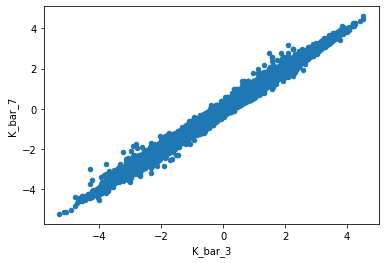

In [19]:
# these should be perfectly correlated, 
# since K_observed, and its expectation and variance,
# should not depend upon kmer size
chen_mchale_zscores_features.plot.scatter(x='K_bar_3', y='K_bar_7')

<AxesSubplot:xlabel='N_bar_3', ylabel='N_bar_7'>

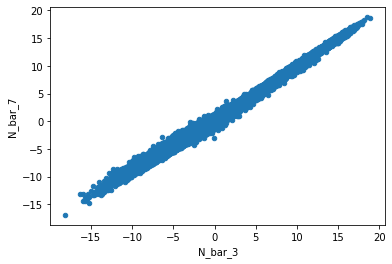

In [20]:
chen_mchale_zscores_features.plot.scatter(x='N_bar_3', y='N_bar_7')

## Exons are predicted to be more constrained than enhancers under both Chen and McHale models, but McHale's model is "best" at differentiating windows that overlap both enhancers and exons

In [21]:
chen_mchale_zscores_features['negative chen zscore'] = -chen_mchale_zscores_features['chen zscore']

In [22]:
chen_mchale_zscores_features['singleton proportion'] = chen_mchale_zscores_features['K_observed']/chen_mchale_zscores_features['M']

In [23]:
def compute_singleton_proportion_error(window): 
    p_hat = window['singleton proportion']
    m = window['M']
    return np.sqrt(p_hat*(1 - p_hat)/m)

chen_mchale_zscores_features['singleton proportion error (ind. sites)'] = chen_mchale_zscores_features.apply(
    compute_singleton_proportion_error, 
    axis = 1
)
chen_mchale_zscores_features

chromosome      start        end  N_observed  K_observed    M  \
0             chr1    1432000    1433000         260         110  257   
1             chr1    1435000    1436000         275         149  272   
2             chr1    1449000    1450000         225         113  223   
3             chr1    1450000    1451000         313         109  308   
4             chr1    1451000    1452000         291         129  291   
...            ...        ...        ...         ...         ...  ...   
1796995       chr9  137269000  137270000         210         104  210   
1796996       chr9  137275000  137276000         295         118  295   
1796997       chr9  137282000  137283000         211         108  211   
1796998       chr9  137290000  137291000         224         106  224   
1796999       chr9  137294000  137295000         182          92  182   

          N_bar_3   K_bar_3   N_bar_5   K_bar_5   N_bar_7   K_bar_7  \
0       -0.228060 -1.917267 -0.256142 -1.929172 -0.302927 -1.954207   
1       -7.687212  1.080743 -7.120401  0.986211 -6.480015  1.006365   
2        0.374691 -0.432022  0.501916 -0.423494  0.375665 -0.402920   
3        2.210181 -3.541284  2.499685 -3.446256  2.604670 -3.416013   
4        2.257523 -1.374487  2.673875 -1.329069  2.948512 -1.317331   
...           ...       ...       ...       ...       ...       ...   
1796995 -3.344501 -0.845439 -3.190151 -0.789062 -2.991450 -0.785837   
1796996  1.945852 -2.483988  1.850597 -2.308449  1.895573 -2.409468   
1796997 -1.847620 -0.409963 -1.660706 -0.411118 -1.537782 -0.333503   
1796998 -0.617396 -1.245816 -0.406692 -1.242247 -0.097785 -1.182283   
1796999 -5.674120 -0.769284 -5.499267 -0.693660 -5.355165 -0.774728   

         chen zscore  enhancer overlap  merged_exon overlap  \
0           2.384293            1000.0                  NaN   
1          -2.952197            1000.0                444.0   
2          -0.899126               NaN                311.0   
3          -5.461776               NaN                758.0   
4          -1.497436               NaN                  NaN   
...              ...               ...                  ...   
1796995    -2.101905            1000.0                  NaN   
1796996    -8.124844             712.0                  NaN   
1796997    -1.325061             572.0                641.0   
1796998     2.257853               NaN                  NaN   
1796999     2.594305            1000.0               1000.0   

         window overlaps enhancer  window overlaps merged_exon  \
0                            True                        False   
1                            True                         True   
2                           False                         True   
3                           False                         True   
4                           False                        False   
...                           ...                          ...   
1796995                      True                        False   
1796996                      True                        False   
1796997                      True                         True   
1796998                     False                        False   
1796999                      True                         True   

        window overlaps (enhancer, merged_exon)  negative chen zscore  \
0                                 (True, False)             -2.384293   
1                                  (True, True)              2.952197   
2                                 (False, True)              0.899126   
3                                 (False, True)              5.461776   
4                                (False, False)              1.497436   
...                                         ...                   ...   
1796995                           (True, False)              2.101905   
1796996                           (True, False)              8.124844   
1796997                            (True, True)              1.325061  

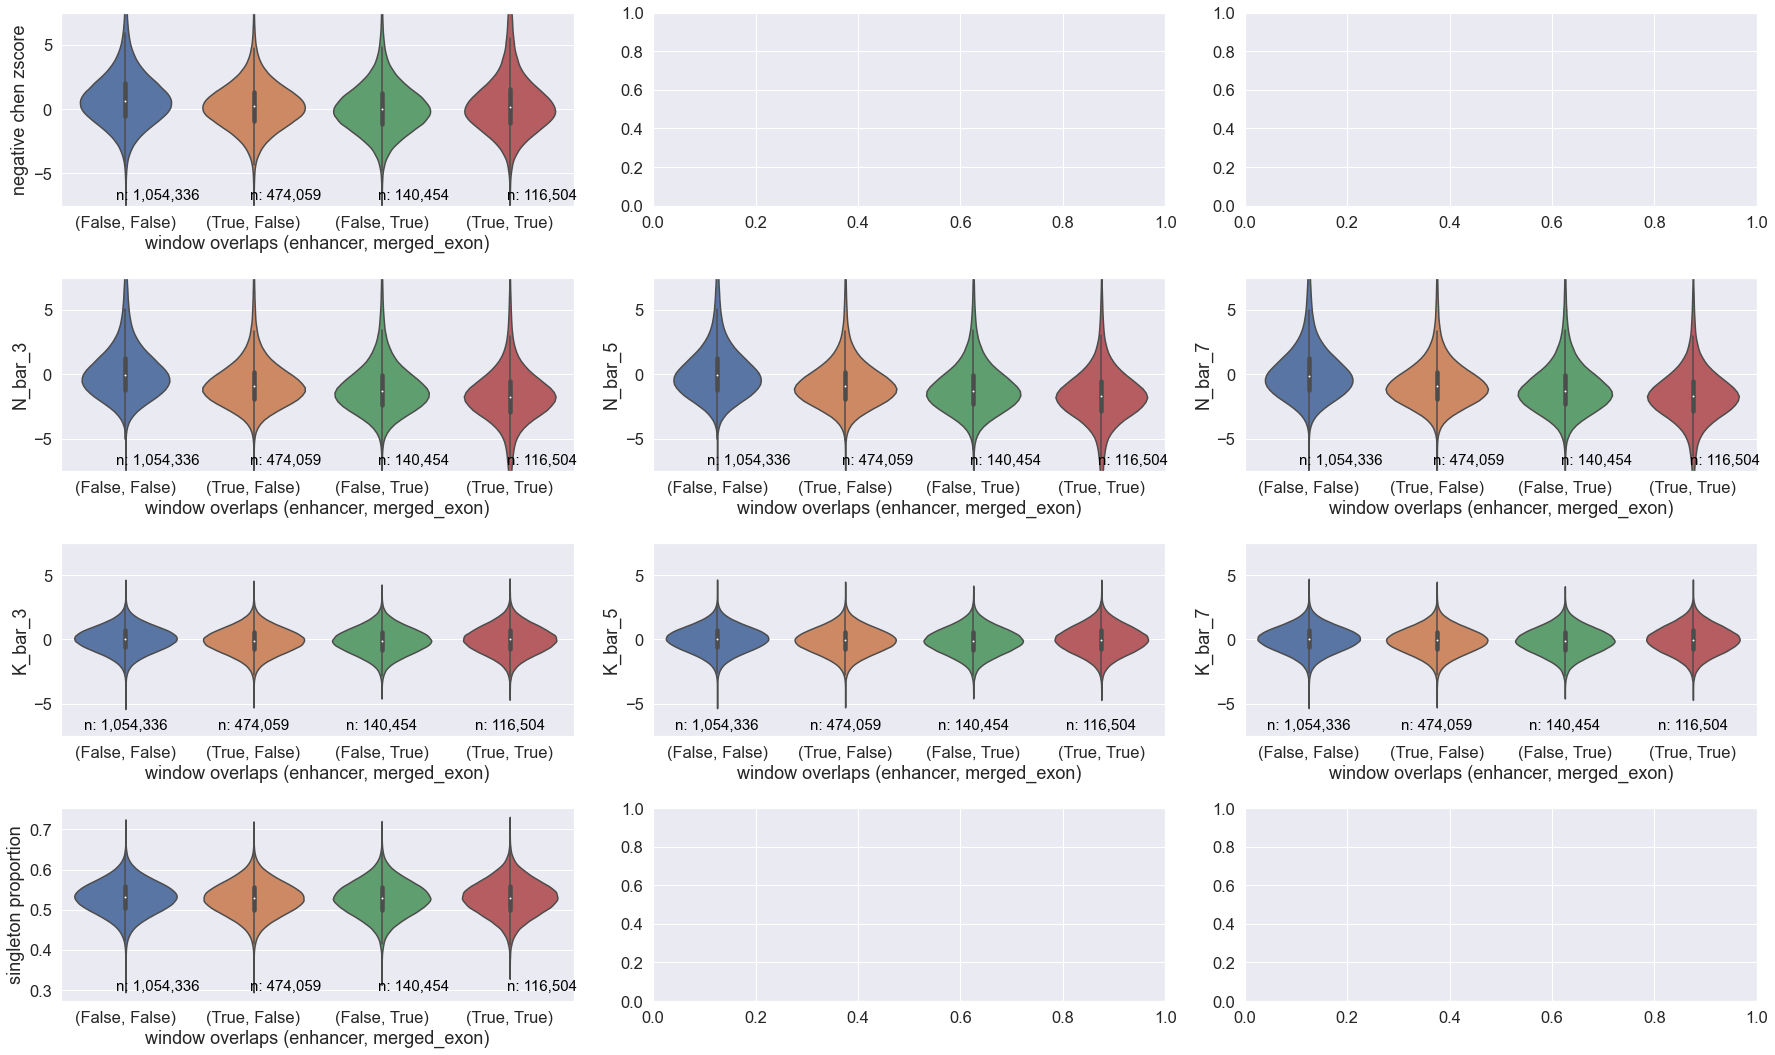

In [24]:
import seaborn as sns
sns.set(font_scale = 1.5)

import matplotlib.pyplot as plt 

def display_number_observations(ax, x_offset, y): 
    number_observations_per_group = chen_mchale_zscores_features['window overlaps (enhancer, merged_exon)'].value_counts().values
    number_observations_per_group = [f'n: {count:,}' for count in number_observations_per_group]

    for index, count in enumerate(number_observations_per_group): 
        ax.text(
            index + x_offset, 
            y, 
            count,
            horizontalalignment = 'center',
            size = 'small',
            color = 'black',
#             weight = 'semibold'
        )

fig, axs = plt.subplots(4, 3, figsize=(25,15))

sns.violinplot(
    data = chen_mchale_zscores_features, 
    y = 'negative chen zscore', 
    x = 'window overlaps (enhancer, merged_exon)',
    ax = axs[0, 0],
    scale = "area" # each violin will have the same area
)
axs[0, 0].set_ylim([-7.5, 7.5])
display_number_observations(axs[0, 0], 0.25, -7)

for j, y in enumerate(['N_bar_3', 'N_bar_5', 'N_bar_7']):
    sns.violinplot(
        data = chen_mchale_zscores_features, 
        y = y, 
        x = 'window overlaps (enhancer, merged_exon)',
        ax = axs[1, j],
        scale = "area" # each violin will have the same area
    )
    axs[1, j].set_ylim([-7.5, 7.5])
    display_number_observations(axs[1, j], 0.25, -7)

for j, y in enumerate(['K_bar_3', 'K_bar_5', 'K_bar_7']):
    sns.violinplot(
        data = chen_mchale_zscores_features, 
        y = y, 
        x = 'window overlaps (enhancer, merged_exon)',
        ax = axs[2, j],
        scale = "area" # each violin will have the same area
    )
    axs[2, j].set_ylim([-7.5, 7.5])
    display_number_observations(axs[2, j], 0, -7)

sns.violinplot(
    data = chen_mchale_zscores_features, 
    y = 'singleton proportion', 
    x = 'window overlaps (enhancer, merged_exon)',
    ax = axs[3, 0],
    scale = "area" # each violin will have the same area
)
display_number_observations(axs[3, 0], 0.25, 0.3)

fig.tight_layout()


## Singleton proportion does not differ significantly between classes defined by overlap with enhancers and exons 

In [25]:
def compute_net_singleton_proportion(): 
    df = (
        chen_mchale_zscores_features
        .groupby(['window overlaps (enhancer, merged_exon)'])
        .agg({
            'M': 'sum',
            'K_observed': 'sum',
            'chen zscore': 'mean',
            'N_bar_3': 'mean',
            'N_bar_5': 'mean',
            'N_bar_7': 'mean',
            'K_bar_3': 'mean',
            'K_bar_5': 'mean',
            'K_bar_7': 'mean'
        })
    ) 
    df['singleton proportion'] = df['K_observed']/df['M']
    return df 

compute_net_singleton_proportion()


M  K_observed  chen zscore  \
window overlaps (enhancer, merged_exon)                                       
(False, False)                           214421660   113516553    -0.826813   
(True, False)                             93149354    49076856    -0.263014   
(False, True)                             27075429    14249011    -0.097136   
(True, True)                              23387951    12364796    -0.427376   

                                          N_bar_3   N_bar_5   N_bar_7  \
window overlaps (enhancer, merged_exon)                                 
(False, False)                           0.283549  0.272461  0.257964   
(True, False)                           -0.694259 -0.689702 -0.676329   
(False, True)                           -1.024931 -1.011930 -1.010844   
(True, True)                            -1.694595 -1.642753 -1.596537   

                                          K_bar_3   K_bar_5   K_bar_7  \
window overlaps (enhancer, merged_exon)                                 
(False, False)                           0.028312  0.027826  0.027644   
(True, False)                           -0.091027 -0.091350 -0.091498   
(False, True)                           -0.112863 -0.113199 -0.113160   
(True, True)                            -0.010144 -0.010814 -0.010940   

                                         singleton proportion  
window overlaps (enhancer, merged_exon)                        
(False, False)                                       0.529408  
(True, False)                                        0.526862  
(False, True)                                        0.526271  
(True, True)                                         0.528682

## N_bar_X and K_bar_X are anticorrelated in windows that overlap both enhancers and exons, but not for other windows 

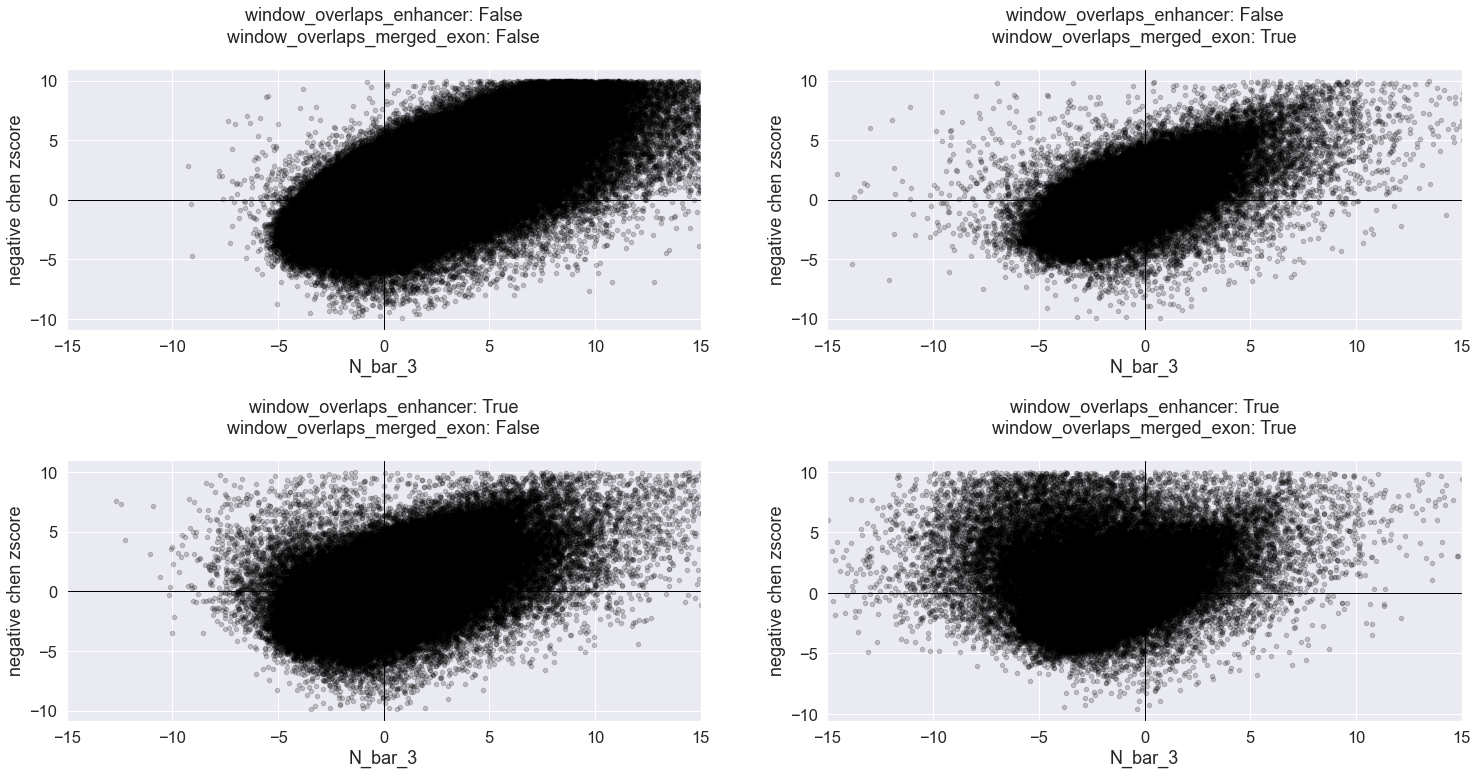

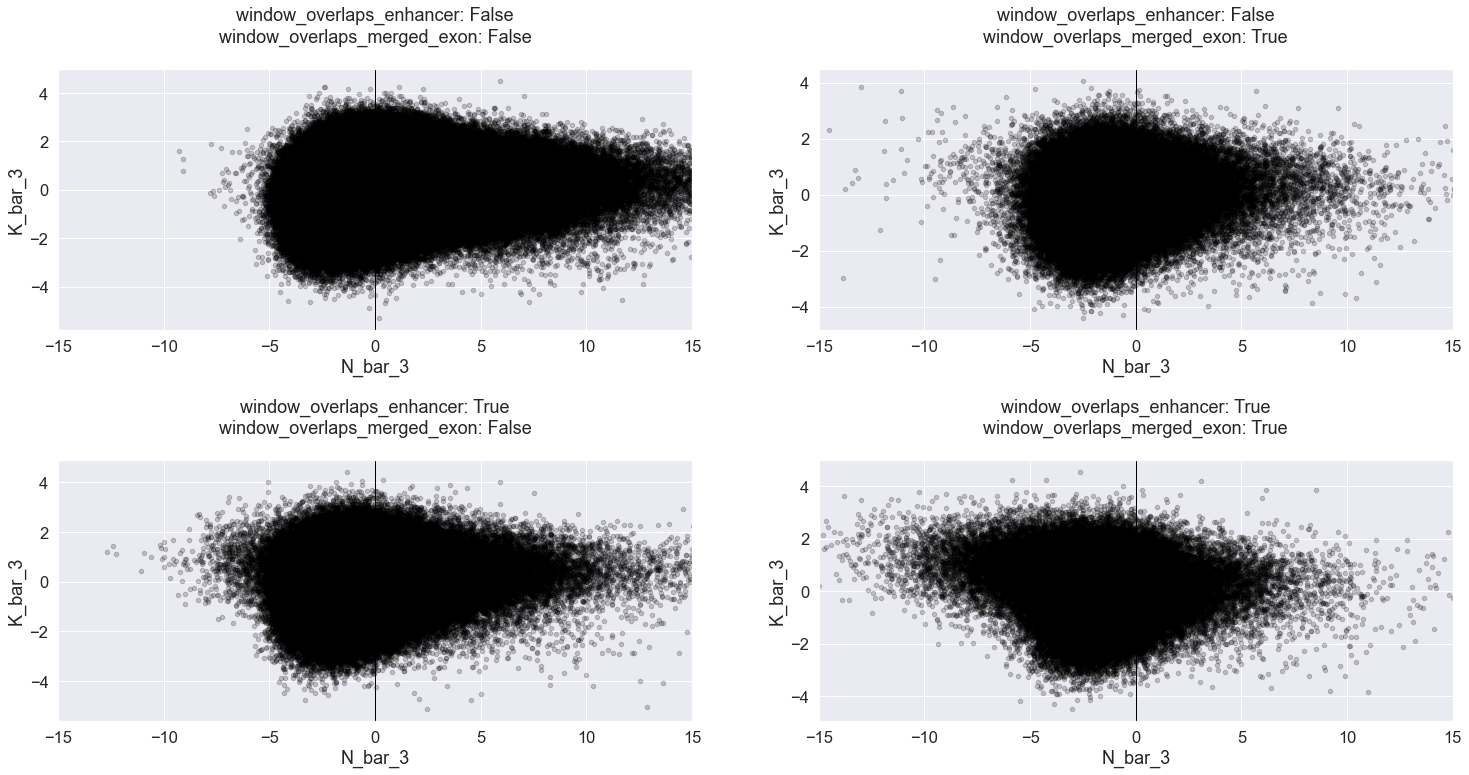

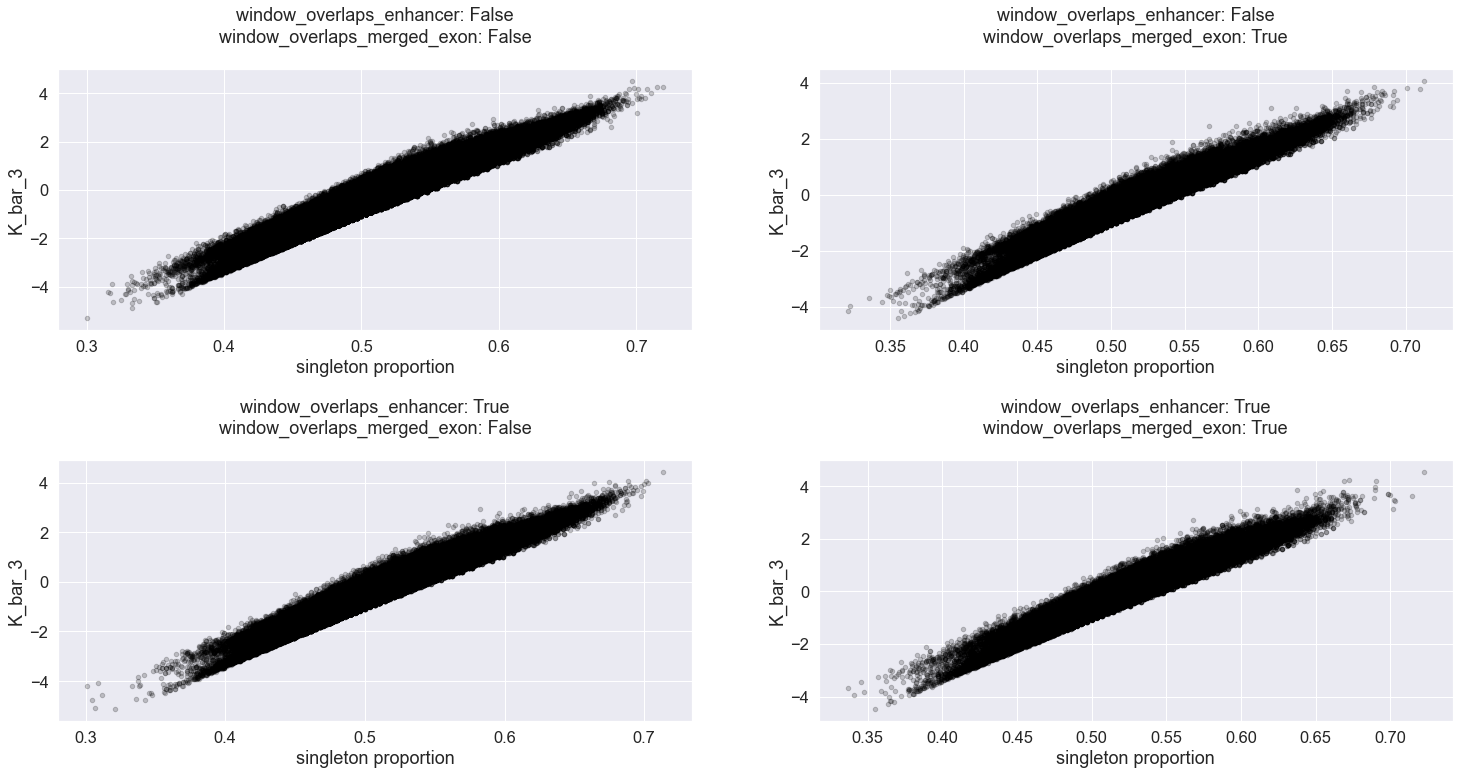

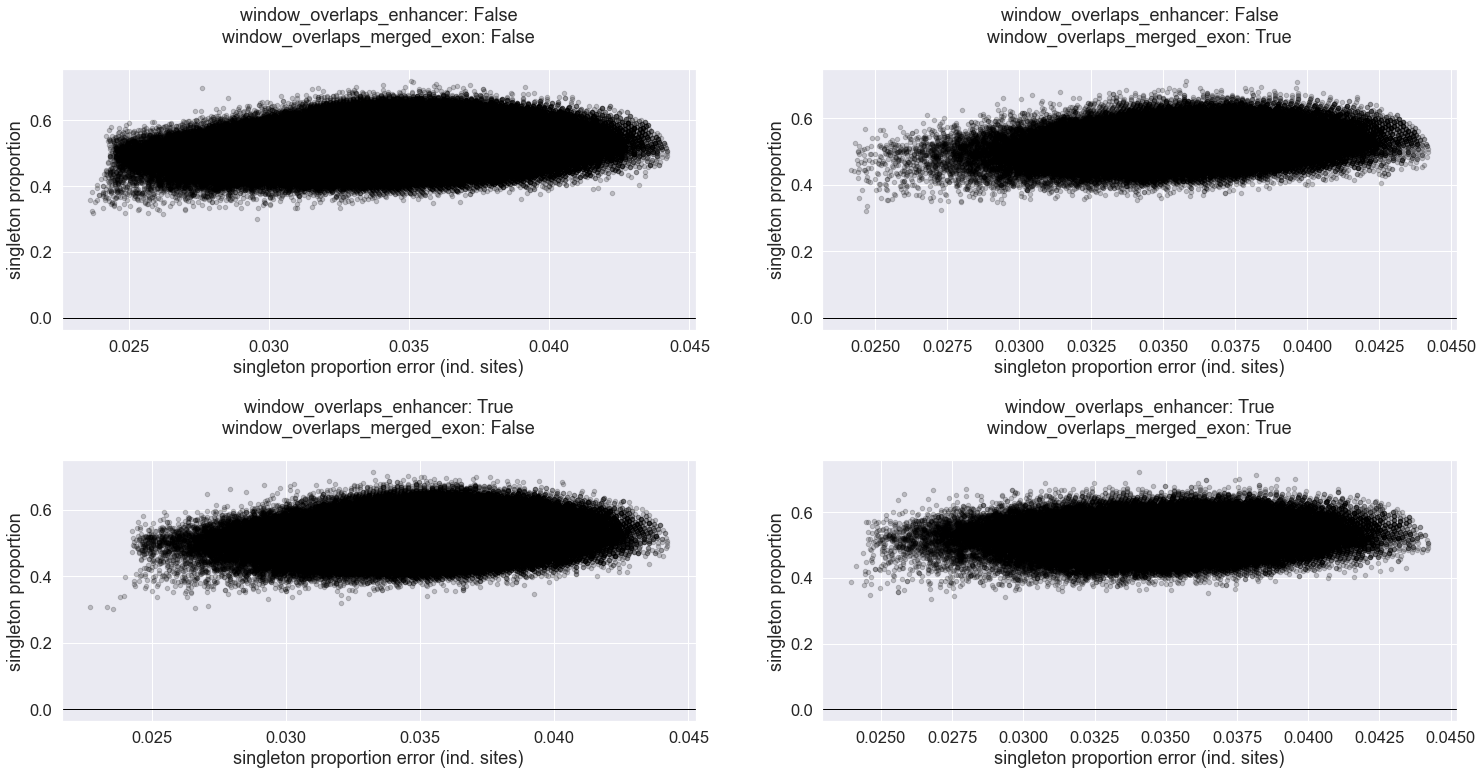

In [26]:
def scatter_plot(x, y, step_size=1): 
    df = chen_mchale_zscores_features.iloc[::step_size, :]
        
    fig, axs = plt.subplots(2, 2, figsize=(25,12))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
    
    for i, window_overlaps_enhancer in enumerate([False, True]):
        for j, window_overlaps_merged_exon in enumerate([False, True]):
            axis = axs[i, j]
            filtered = df[
                (df['window overlaps enhancer'] == window_overlaps_enhancer) & 
                (df['window overlaps merged_exon'] == window_overlaps_merged_exon) 
            ]
            axis = filtered.plot.scatter(
                x = x,
                y = y,
                c = 'black',
                alpha = 0.2,
                ax = axis,
            )
            if (x != 'singleton proportion error (ind. sites)') and (x != 'singleton proportion'): 
                axis.set_xlim(-15, 15)
                axis.axvline(linewidth=1, color='black')
            if y not in ['K_bar_3', 'K_bar_5', 'K_bar_7']: axis.axhline(linewidth=1, color='black')
            title = (
                f'window_overlaps_enhancer: {window_overlaps_enhancer}\n'
                f'window_overlaps_merged_exon: {window_overlaps_merged_exon}\n'
            )
            if step_size > 1:
                title += f'downsampled {step_size}-fold'
            axis.set_title(title)

def scatter_plots(kmer_size, step_size = 1):
    scatter_plot(
        x = f'N_bar_{kmer_size}', 
        y = 'negative chen zscore',
        step_size = step_size
    )
    scatter_plot(
        x = f'N_bar_{kmer_size}', 
        y = f'K_bar_{kmer_size}',
        step_size = step_size
    )
    scatter_plot(
        x = 'singleton proportion', 
        y = f'K_bar_{kmer_size}',
        step_size = step_size
    )
    scatter_plot(
        x = 'singleton proportion error (ind. sites)', 
        y = 'singleton proportion',
        step_size = step_size
    )
    
# These plots show that there is a large enrichment for enhancers and/or exons when N_bar_X < 0 and K_bar_X > 0.
# That K_bar_X > 0 inequality corresponds to an increase in the fraction of variants in each window that are singletons, 
# and is a significant result because the estimated error in computing the singleton proportion is smaller than the effect size. 
scatter_plots(kmer_size=3, step_size=1)

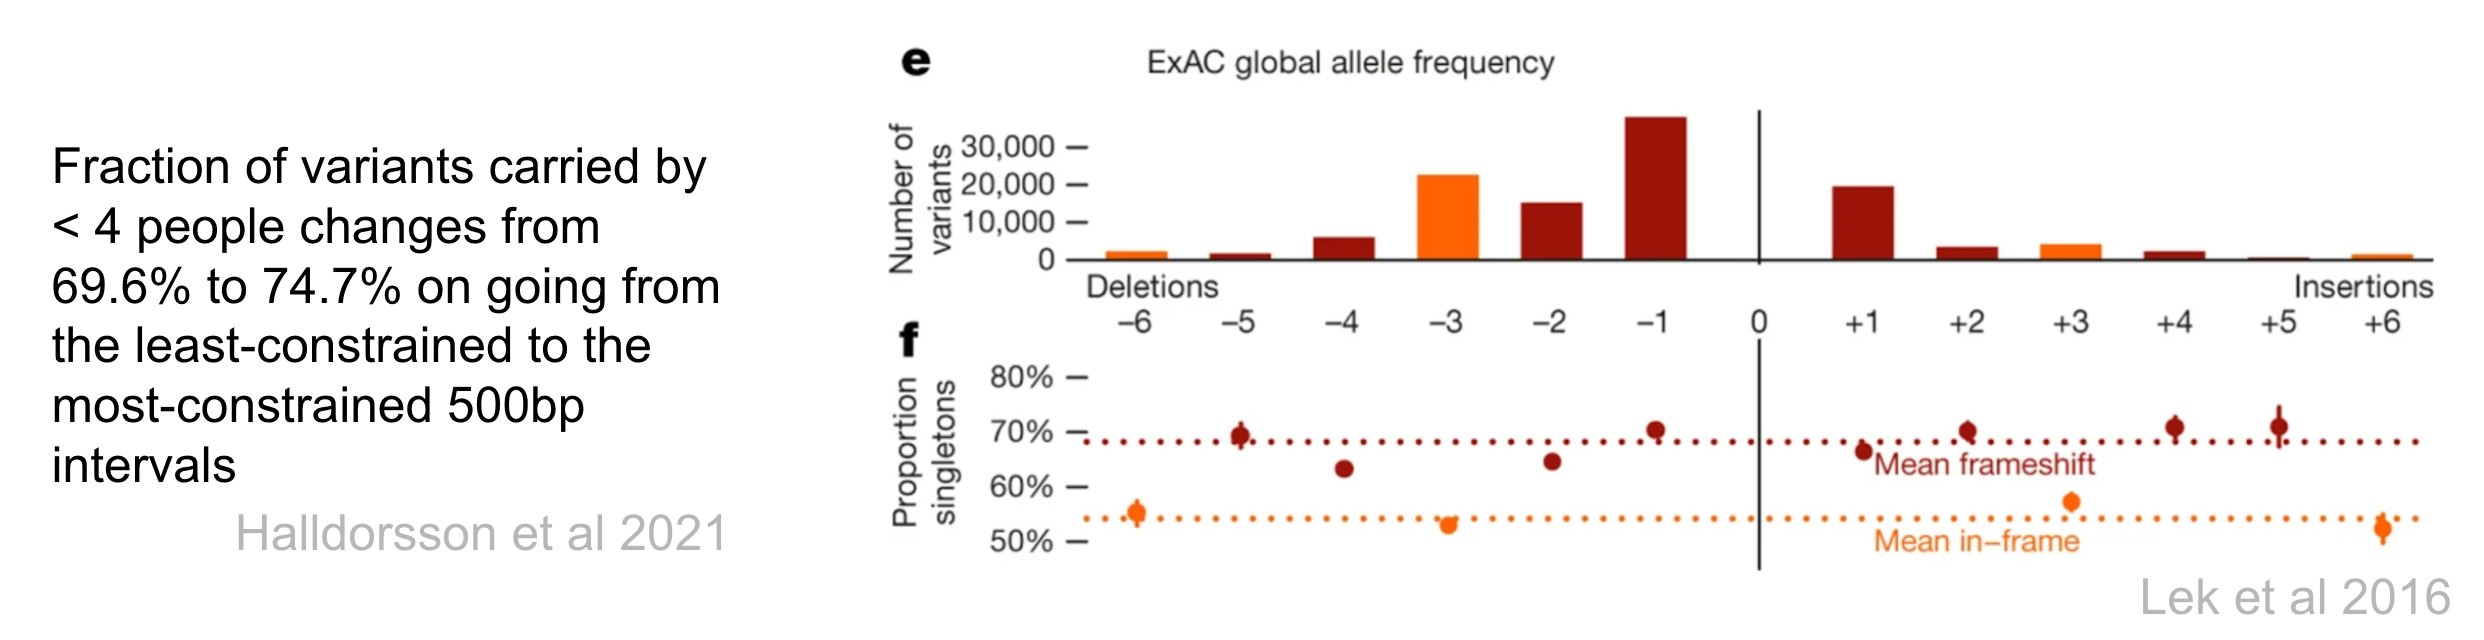

In [27]:
# The result that singleton proportion 
# goes up in putatively constrained regions 
# is consistent with earlier results: 

# embed raw image data in notebook: 
# https://github.com/microsoft/vscode-jupyter/issues/6437
from IPython.display import Image

Image(filename='singleton-proportion-is-high-in-constrained-regions.png', width=1000)

## McHale's N_bar_X appears to explain more of the variance in enhancer fraction than Chen's zscore (c.f. Fig 2a of Chen et al 2022), at least in noncoding regions; Also enhancers are more likely to appear close to exons (observe the position on colobars of white, which corresponds to the baseline_fraction_of_windows_that_overlap_enhancer)

Note also the correlation between the z-scores, as demonstrated in 

```
experiments/germline-model/chen-et-al-2022/Fig_1a.ipynb 
```

<ipython-input-28-c98eeafad9ce>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x["column"]} bin'] = pd.cut(df[x['column']], bins=compute_bins(x['number_of_bins']))
<ipython-input-28-c98eeafad9ce>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{y["column"]} bin'] = pd.cut(df[y['column']], bins=compute_bins(y['number_of_bins']))


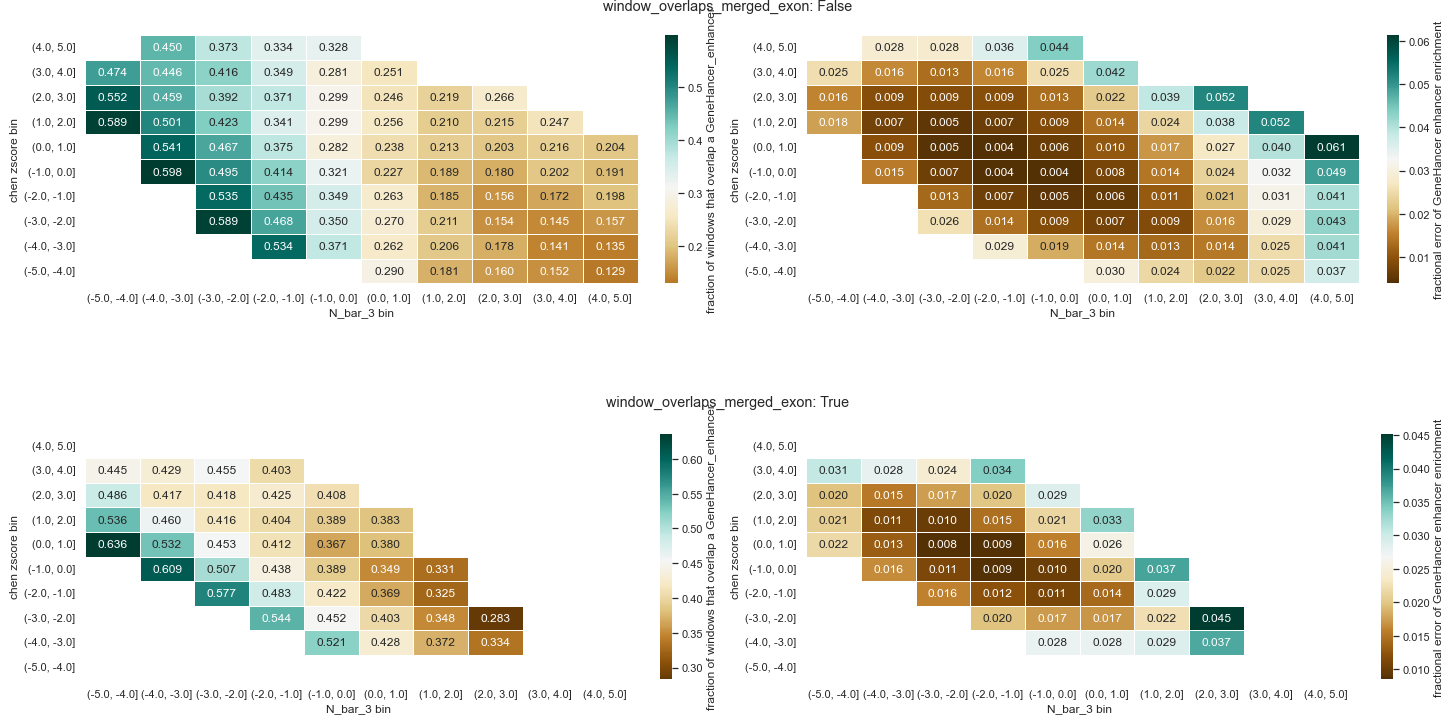

In [28]:
def baseline_fraction_of_windows_that_overlap_enhancer(df, z): 
    return np.mean(df[z['column']])

def compute_bins(number_bins, min_value=-5, max_value=5): 
    bin_width = (max_value - min_value)/number_bins
    bins = np.arange(min_value, max_value+0.5*bin_width, bin_width)
    return bins
    
def aggregate_2d(grouped_windows, x, y, z, aggregation_function): 
    aggregated = grouped_windows.agg({z["column"]: [aggregation_function]})
    aggregated.columns = [f'{z["column"]}_{aggregation_function}']
    aggregated = aggregated.reset_index()
    
    # pivot the data into a 2d array 
    # https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-pivoting-dataframe-objects
    aggregated = aggregated.pivot(index=f'{y["column"]} bin', columns=f'{x["column"]} bin', values=f'{z["column"]}_{aggregation_function}')
    
    return aggregated
    
def plot_heat_map(df, x, y, z, count_threshold, ax, heat_map_type): 
    # https://pandas.pydata.org/docs/reference/api/pandas.cut.html
    df[f'{x["column"]} bin'] = pd.cut(df[x['column']], bins=compute_bins(x['number_of_bins']))
    if y['column'] != 'singleton proportion':
        df[f'{y["column"]} bin'] = pd.cut(df[y['column']], bins=compute_bins(y['number_of_bins']))
    else: 
        df[f'{y["column"]} bin'] = pd.cut(df[y['column']], bins=compute_bins(y['number_of_bins'], min_value=0.3, max_value=0.8))

    grouped_windows = df.groupby([f'{x["column"]} bin', f'{y["column"]} bin'])
    
    sample_mean = aggregate_2d(grouped_windows, x, y, z, 'mean')
    sample_std = aggregate_2d(grouped_windows, x, y, z, 'std')
    
    sample_size = pd.DataFrame(grouped_windows.size())
    sample_size.columns = ['counts']
    sample_size = sample_size.reset_index()

    # pivot the data into a 2d array
    # https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-pivoting-dataframe-objects
    sample_size = sample_size.pivot(index=f'{y["column"]} bin', columns=f'{x["column"]} bin', values='counts')
    
    # https://en.wikipedia.org/wiki/Standard_error
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.divide.html
    standard_error_of_mean = sample_std / np.sqrt(sample_size)
    
    mask = sample_size < count_threshold

    if heat_map_type == 'GeneHancer enhancer enrichment':
        heat_map = sample_mean 
        center = baseline_fraction_of_windows_that_overlap_enhancer(df, z)
        heat_map_colorbar_label = z['GeneHancer enhancer enrichment label']
    elif heat_map_type == 'GeneHancer enhancer enrichment fractional error': 
        heat_map = standard_error_of_mean/sample_mean
        center = None
        heat_map_colorbar_label = z['fractional error label']
    else:
        raise ValueError
        
    # https://seaborn.pydata.org/generated/seaborn.heatmap.html
    sns.heatmap(
        heat_map, 
        cmap = 'BrBG', 
        center = center, 
        annot = True, 
        fmt = '.3f',
        linewidths = .5, 
        cbar_kws = {'label': heat_map_colorbar_label},
        ax = ax,
        mask = mask
    )
    ax.invert_yaxis()
       
def plot_heat_maps(df, x_number_of_bins, y_number_of_bins, x_column, y_column, subfig):
    with sns.axes_style("white"):        
        axs = subfig.subplots(1, 2)
        for i, heat_map_type in enumerate([
            'GeneHancer enhancer enrichment', 
            'GeneHancer enhancer enrichment fractional error'
        ]):
            plot_heat_map(
                df = df,
                x = {
                    'column': x_column,
                    'number_of_bins': x_number_of_bins
                },
                y = { 
                    'column': y_column,
                    'number_of_bins': y_number_of_bins
                },
                z = {
                    'column': 'window overlaps enhancer',
                    'GeneHancer enhancer enrichment label': 'fraction of windows that overlap a GeneHancer_enhancer',
                    'fractional error label': 'fractional error of GeneHancer enhancer enrichment'
                },
                count_threshold = 1e3,
                ax = axs[i],
                heat_map_type = heat_map_type,
            )
            
def plot_heat_maps_stratified(x_number_of_bins, y_number_of_bins, x_column, y_column):
    # sns.set(rc = {'figure.figsize': (10, 8)})
    sns.set(font_scale = 1)

    fig = plt.figure(constrained_layout=True, figsize=(20, 10))
    subfigs = fig.subfigures(2, 1, hspace=0.2)

    for j, window_overlaps_merged_exon in enumerate([False, True]):
        df = chen_mchale_zscores_features
        filtered = df[
            (df['window overlaps merged_exon'] == window_overlaps_merged_exon) 
        ]
        subfig = subfigs[j]
        plot_heat_maps(
            df = filtered,
            x_number_of_bins = x_number_of_bins, 
            y_number_of_bins = y_number_of_bins,
            x_column = x_column,
            y_column = y_column,
            subfig = subfig,
        )            
        title = (
            f'window_overlaps_merged_exon: {window_overlaps_merged_exon}\n'
        )
        subfig.suptitle(title)

plot_heat_maps_stratified(
    x_number_of_bins = 10, 
    y_number_of_bins = 10,
    x_column = 'N_bar_3',
    y_column = 'chen zscore',
)

## McHale's K_bar_X in conjunction with McHale's N_bar_X appears to explain more of the variance in enhancer fraction than McHale's N_bar_X can by itself 

Note the absence of correlation between mchale_K_bar and chen_zscore, as demonstrated in 

```
experiments/germline-model/chen-et-al-2022/Fig_1a.ipynb
```


<ipython-input-28-c98eeafad9ce>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x["column"]} bin'] = pd.cut(df[x['column']], bins=compute_bins(x['number_of_bins']))
<ipython-input-28-c98eeafad9ce>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{y["column"]} bin'] = pd.cut(df[y['column']], bins=compute_bins(y['number_of_bins']))


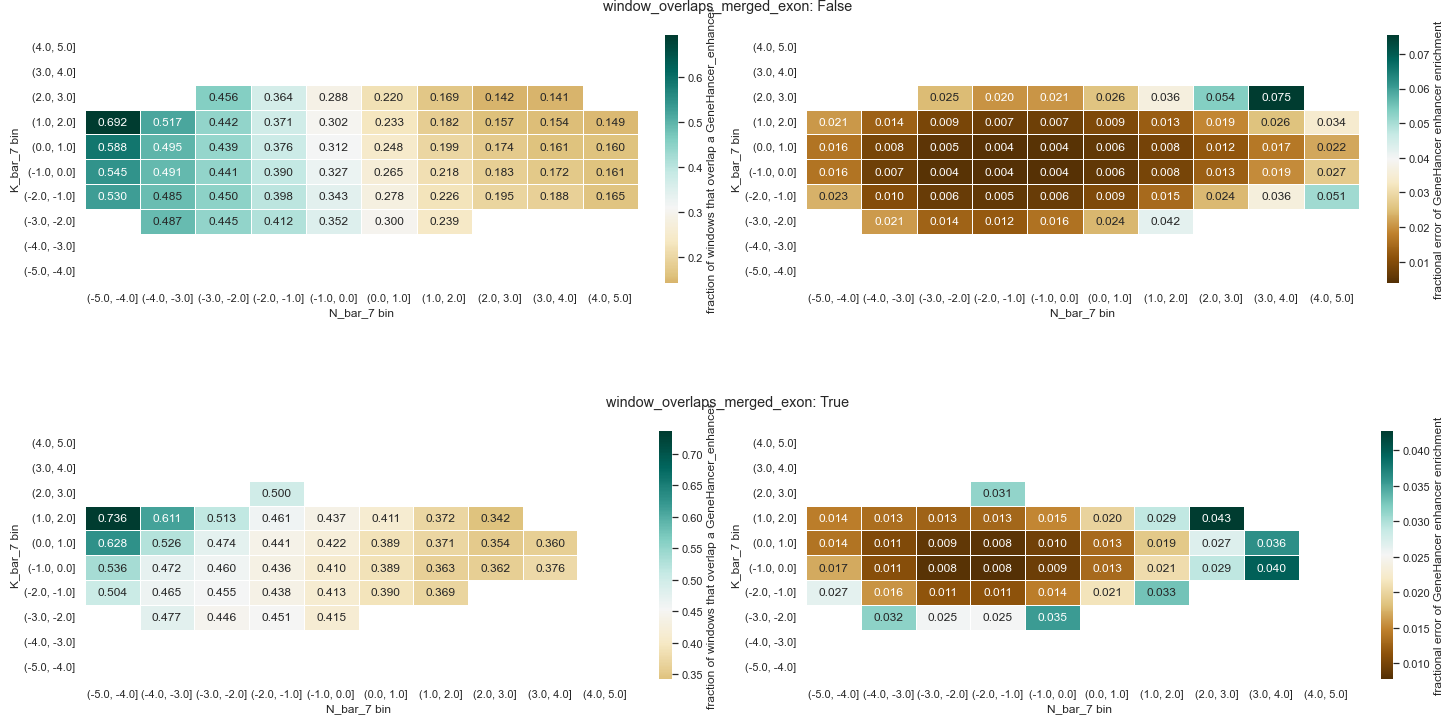

In [29]:
def plot_K_bar_vs_N_bar(kmer_size):
    plot_heat_maps_stratified(
        x_number_of_bins = 10, 
        y_number_of_bins = 10,
        x_column = f'N_bar_{kmer_size}',
        y_column = f'K_bar_{kmer_size}', 
    )
    
plot_K_bar_vs_N_bar(kmer_size=7)

## Singleton proportion in conjunction with McHale's N_bar_X appears to explain more of the variance in enhancer fraction than McHale's N_bar_X can by itself 

<ipython-input-28-c98eeafad9ce>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x["column"]} bin'] = pd.cut(df[x['column']], bins=compute_bins(x['number_of_bins']))
<ipython-input-28-c98eeafad9ce>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{y["column"]} bin'] = pd.cut(df[y['column']], bins=compute_bins(y['number_of_bins'], min_value=0.3, max_value=0.8))


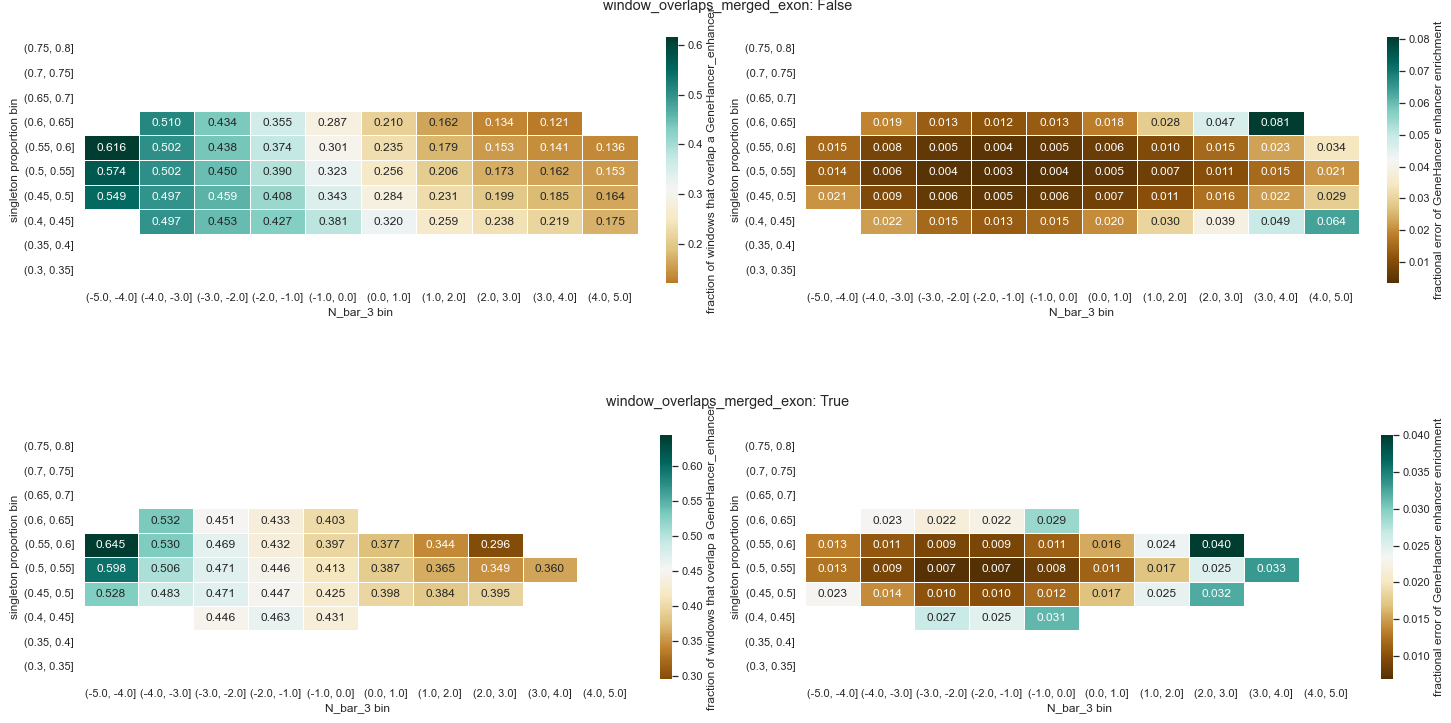

In [30]:
plot_heat_maps_stratified(
    x_number_of_bins = 10, 
    y_number_of_bins = 10,
    x_column = 'N_bar_3',
    y_column = 'singleton proportion'
)

## Why this is a model-selection exercise, and not just a goodness-of-fit test

One could use Analysis of Variance/F-test approaches to quantify and support the assertion that SNV and singleton counts together explain more of the variation in constraint than SNV counts alone. See, e.g., Section 10.6 of Probability and Statistics for Engineers and Scientists, 4th edition, by Sheldon Ross. 

Ultimately, though, we wish to demonstrate that considering SNV density and singleton density leads to a more *predictive* 
model of constraint than using SNV density alone. 




## A simple discriminant-function classifier that predicts whether a window contains an enhancer (or an exon) can yield a lower FDR using N_bar_X and K_bar_X than when using Chen's zscore

In [31]:
for kmer_size in [3, 5, 7]:
    chen_mchale_zscores_features[f'negative N_bar_{kmer_size}'] = -chen_mchale_zscores_features[f'N_bar_{kmer_size}']
    chen_mchale_zscores_features[f'negative K_bar_{kmer_size}'] = -chen_mchale_zscores_features[f'K_bar_{kmer_size}']

In [32]:
def window_overlaps_feature_values():
    return [False, True] 

In [33]:
from sklearn.metrics import precision_score, recall_score
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
from tqdm import tqdm


In [34]:

# def sort_data(data):
#     list_of_triplets = list(zip(*(data)))
#     sorted_list_of_triplets = sorted(list_of_triplets, key=lambda triple: triple[1])
#     FDRs, recalls, thresholds = list(zip(*sorted_list_of_triplets))
#     return list(FDRs), list(recalls), list(thresholds)

# def compute_FDRs_recalls_thresholds_Chen(feature_to_classify_by, df, row): 
#     y_true = np.array(df[feature_to_classify_by]).astype(int)
#     zscores = df[['chen zscore']]
#     FDRs, recalls, thresholds = [], [], []
#     for threshold in tqdm(np.linspace(-9, 9, 50), desc=f'Classify using Chen scores, row {row}'): 
#         y_pred = np.array(zscores > threshold).astype(int)    
#         with warnings.catch_warnings():
#             warnings.simplefilter("ignore")
#             FDRs.append(1.0 - precision_score(y_true, y_pred, pos_label=1))
#         recalls.append(recall_score(y_true, y_pred, pos_label=1))
#         thresholds.append(threshold)
#     return FDRs, recalls, thresholds

# def compute_FDRs_recalls_thresholds_McHale(feature_to_classify_by, df, row, kmer_size): 
#     y_true = np.array(df[feature_to_classify_by]).astype(int)
#     zscores = df[[f'negative N_bar_{kmer_size}', f'K_bar_{kmer_size}']]
#     FDRs, recalls, thresholds = [], [], []
#     for threshold_negative_Nbar in tqdm(np.linspace(-9, 9, 7), desc=f'Classify using McHale scores, row {row}'): 
#         for threshold_Kbar in np.linspace(-3, 3, 7): 
#             threshold = [threshold_negative_Nbar, threshold_Kbar]
#             y_pred = np.all(zscores > threshold, axis=1).astype(int)    
#             with warnings.catch_warnings():
#                 warnings.simplefilter("ignore")
#                 FDRs.append(1.0 - precision_score(y_true, y_pred, pos_label=1))
#             recalls.append(recall_score(y_true, y_pred, pos_label=1))
#             thresholds.append(threshold)
#     return FDRs, recalls, thresholds

# def plot_recall_vs_FDR(feature_to_classify_by, df, fig, row, col, showlegend, kmer_size): 
#     FDRs_Chen, recalls_Chen, thresholds_Chen = sort_data(compute_FDRs_recalls_thresholds_Chen(feature_to_classify_by, df, row))
#     FDRs_McHale, recalls_McHale, thresholds_McHale = sort_data(compute_FDRs_recalls_thresholds_McHale(feature_to_classify_by, df, row, kmer_size))

#     fig.add_trace(
#         go.Scatter(
#             x = recalls_Chen, 
#             y = FDRs_Chen,
#             mode = 'lines+markers',
#             line = dict(color='red'),
#             name = 'Chen',
#             hovertemplate = (
#                 '%{text}'
#             ),
#             text = [f'Chen zscore threshold: {threshold_Chen}' for threshold_Chen in thresholds_Chen],
#             showlegend = showlegend
#         ),
#         row = row, 
#         col = col,
#     )
#     fig.add_trace(
#         go.Scatter(
#             x = recalls_McHale, 
#             y = FDRs_McHale,
#             mode = 'lines+markers',
#             line = dict(color='green'),
#             name = 'McHale',
#             hovertemplate = (
#                 '%{text}'
#             ),
#             text = [
#                 (
#                     f'threshold_negative_Nbar: {threshold_negative_Nbar}<br>' 
#                     f'threshold_Kbar: {threshold_Kbar}' 
#                 )
#                 for threshold_negative_Nbar, threshold_Kbar in thresholds_McHale
#             ],
#             showlegend = showlegend
#         ),
#         row = row, 
#         col = col,
#     )
    
#     baseline_FDR = 1 - np.mean(df[feature_to_classify_by])
#     fig.add_trace(
#         go.Scatter(
#             x = [1e-5, 1e0], 
#             y = [baseline_FDR, baseline_FDR],
#             mode = 'lines',
#             line = dict(color='black'),
#             name = 'baseline',
#             showlegend = showlegend
#         ),
#         row = row, 
#         col = col,
#     )
    
#     fig.update_xaxes(
#         type="log", 
#         exponentformat = 'power', 
#         row=row, 
#         col=col,
#     )
#     fig.update_yaxes(
#         range = [0, 1], 
#         row=row, 
#         col=col
#     )
    
# def plot_recall_vs_FDR_stratified(feature_to_stratify_by, feature_to_classify_by, kmer_size): 
#     fig = make_subplots(
#         rows = 2, 
#         cols = 1,
#         shared_xaxes = True, 
#         shared_yaxes = True,  
#         x_title = 'Recall', 
#         y_title = 'FDR',
#         subplot_titles = [
#             f'{feature_to_stratify_by}: {window_overlaps_feature}' 
#             for window_overlaps_feature in window_overlaps_feature_values()
#         ]        
#     )
    
#     for i, window_overlaps_feature in enumerate(window_overlaps_feature_values()):
# #         if i == 0: continue 
#         df = chen_mchale_zscores_features
#         filtered = df[
#             (df[feature_to_stratify_by] == window_overlaps_feature) 
#         ]
#         plot_recall_vs_FDR(
#             feature_to_classify_by = feature_to_classify_by,
#             df = filtered,
#             fig = fig,
#             row = i + 1,
#             col = 1,
#             showlegend = True if i == 0 else False,
#             kmer_size = kmer_size
#         )            
        
#     fig.update_layout(
#         height = 800, 
#         width = 1000,
#         font = dict(
#             size = 20,
#         )        
#     )
#     fig.update_annotations(font_size=24)
#     fig.show()
    
# plot_recall_vs_FDR_stratified(
#     feature_to_stratify_by = 'window overlaps merged_exon',
#     feature_to_classify_by = 'window overlaps enhancer',
#     kmer_size = 3
# )


In [35]:
# plot_recall_vs_FDR_stratified(
#     feature_to_stratify_by = 'window overlaps enhancer',
#     feature_to_classify_by = 'window overlaps merged_exon',
#     kmer_size = 3
# )

## The predicted probabilities under a logistic regression model have magnitudes and contours that are consistent with the heat maps shown above


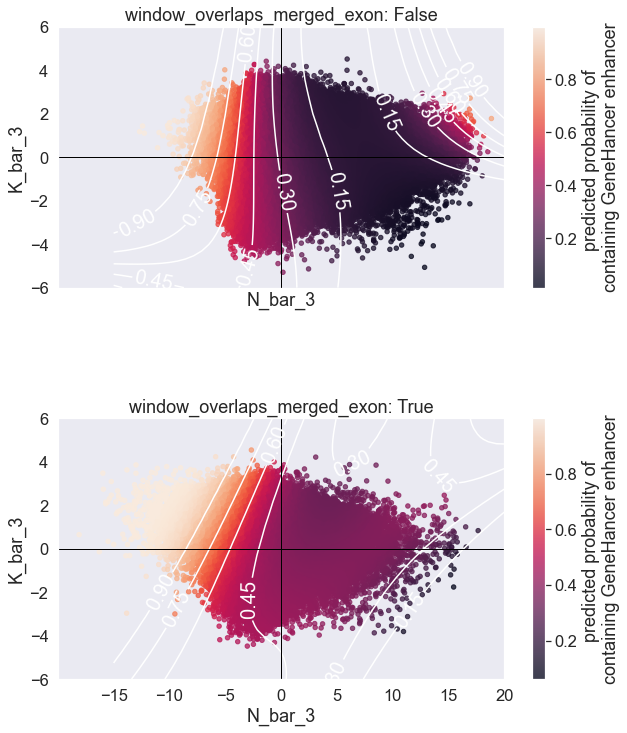

In [36]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

sns.set(font_scale = 1.5)    

def compute_X(df, predictors):
    X = df[predictors]
    return X

def compute_y(df): 
    return df['window overlaps enhancer']
   
def compute_pipe(): 
    # mean removal and variance scaling
    # https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
    
    # identity transform: 
    # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html    

    pipe = Pipeline(steps = [
        ('scaler', StandardScaler()),
        ('preprocessor', PolynomialFeatures(degree=3, include_bias=False)),
        ('estimator', LogisticRegression())
    ])
    
    return pipe 

def compute_pipe_X_y(df, predictors): 
    X = compute_X(df, predictors)
    y = compute_y(df)
    pipe = compute_pipe()  
    return pipe, X, y

def plot_contours(ax, model_):
    X_1d, Y_1d = np.linspace(-15, 20, 50), np.linspace(-6, 6, 50)
    X_2d, Y_2d = np.meshgrid(X_1d, Y_1d)
    Z = np.zeros((len(Y_1d), len(X_1d)))
    for i in range(len(Y_1d)): 
        for j in range(len(X_1d)):
            xx, yy = X_1d[j], Y_1d[i]
            import warnings
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                Z[i, j] = model_.predict_proba([[xx, yy]])[0,1]            
    contours = ax.contour(X_2d, Y_2d, Z, colors='white')
    ax.clabel(contours, inline=True, fontsize=20)

def plot_predicted_probabilities(df, ax, predictors, step_size, kmer_size):
    pipe, X, y = compute_pipe_X_y(df, predictors)
    pipe.fit(X, y)

    X_2d = compute_X(
        df, 
        predictors=[
            f'N_bar_{kmer_size}',
            f'K_bar_{kmer_size}'
        ]
    )
    X_2d = X_2d.iloc[::step_size, :]
    predicted_probabilites = pipe.predict_proba(X_2d[predictors])

    scatter = ax.scatter(
        X_2d[f'N_bar_{kmer_size}'], 
        X_2d[f'K_bar_{kmer_size}'], 
        c=predicted_probabilites[:,1], 
#                 cmap='RdBu', 
        s=20, 
        alpha=0.75
    ) 
    ax.set_xlabel(f'N_bar_{kmer_size}')
    ax.set_ylabel(f'K_bar_{kmer_size}')
    
    cbar = plt.colorbar(mappable=scatter, ax=ax) 
    cbar.set_label('predicted probability of \ncontaining GeneHancer enhancer')

    ax.axhline(linewidth=1, color='black')
    ax.axvline(linewidth=1, color='black')
        
    if len(predictors) == 2: 
        plot_contours(ax, pipe)
    
def plot_predicted_probabilities_stratified(predictors, step_size, kmer_size):
    with sns.axes_style("dark"):        
        fig, axs = plt.subplots(
            nrows=2, ncols=1, 
            sharex=True, sharey=True,
            figsize=(10,12)
        )
        for i, window_overlaps_merged_exon in enumerate(window_overlaps_feature_values()):
#             if i == 0: continue 
            df = chen_mchale_zscores_features
            df = df[
                (df['window overlaps merged_exon'] == window_overlaps_merged_exon) 
            ]
            ax = axs[i]
            plot_predicted_probabilities(df, ax, predictors, step_size, kmer_size)
            title = (
                f'window_overlaps_merged_exon: {window_overlaps_merged_exon}'
            )
            if step_size > 1:
                title += f'\ndownsampled {step_size}-fold'
            ax.set_title(title) 
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

def plot_predicted_probabilities_stratified_kmer(predictors, kmer_size):
    predictors = [f'{predictor}_{kmer_size}' for predictor in predictors]
    plot_predicted_probabilities_stratified(
        predictors = predictors,
        step_size = 1,
        kmer_size = kmer_size
    )
    
plot_predicted_probabilities_stratified_kmer(
    predictors=[
        'N_bar',
        'K_bar'
    ], 
    kmer_size=3
)

## A simpler Logistic Regression model

The model above uses two features: `N_bar_X` and `K_bar_X`. We next consider a model 
using just one feature: `N_bar_X`. 

The contours of the predicted probability surface are qualitatively different from 
those of the heat maps shown above. 




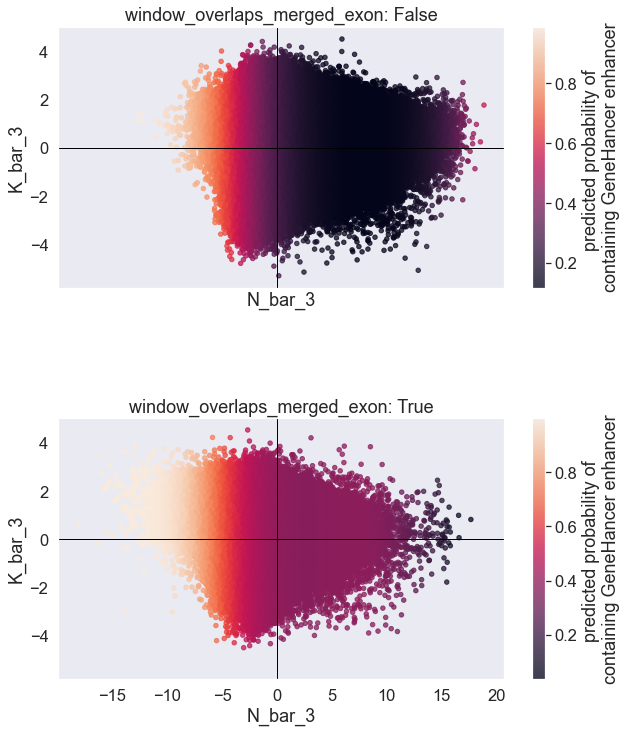

In [37]:
plot_predicted_probabilities_stratified_kmer(
    predictors = [
        'N_bar',
    ],
    kmer_size = 3
)

## Learning curves

In [38]:
def filter_df(
    feature_to_stratify_by,
    window_overlaps_stratify_feature
): 
    df = chen_mchale_zscores_features
    df = df[
        (df[feature_to_stratify_by] == window_overlaps_stratify_feature) 
    ]
    return df


In [39]:
# from sklearn.model_selection import learning_curve

# def plot_learning_curve(df, predictors):  
#     pipe, X, y = compute_pipe_X_y(df, predictors)

#     # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html
#     # shuffle=True: https://stackoverflow.com/a/52368329
#     train_sizes, train_scores, test_scores = learning_curve(
#         pipe, 
#         X, 
#         y, 
#         scoring='neg_log_loss', 
#         shuffle=True, 
#         train_sizes=[
#             100,
#             200, 
#             500, 
#             750,
#             1000, 
#             2000, 
#             5000,
#             7000,
#             10000, 
#             20000,
#             50000,
#             80000,
#             100000,
#             150000,
#             180000,
# #             500000,
# #             1000000,
# #             1250000
#     ])
#     # average over cross validation folds:
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)

#     plt.fill_between(train_sizes, 
#                      train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, 
#                      alpha=0.1, color="r")
#     plt.fill_between(train_sizes, 
#                      test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, 
#                      alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 
#              'o-', color="r", label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 
#              'o-', color="g", label="Cross-validation score")

#     plt.xlabel("Training set size")
#     plt.ylabel('Log likelihood per example')

#     plt.legend(loc="best")
#     plt.xscale('log')


In [40]:
# def plot_learning_curve_kmer(predictors, kmer_size):
#     predictors = [f'{predictor}_{kmer_size}' for predictor in predictors]
#     plot_learning_curve(
#         filter_df(
#             feature_to_stratify_by = 'window overlaps merged_exon', 
#             window_overlaps_stratify_feature = False
#         ), 
#         predictors = predictors
#     )    

# # null model 
# plot_learning_curve_kmer(
#     predictors = ['N_bar'],
#     kmer_size = 3
# )


In [41]:
# # alternative model 
# plot_learning_curve_kmer(
#     predictors=[
#         'N_bar',
#         'K_bar'
#     ],
#     kmer_size = 3
# )

## The Likelihood Ratio Test shows that the general model fits the data significantly better than the nested model

Since the null model is a constrained version of the alternative model, we may attempt to apply the Likelihood Ratio Test,
c.f. https://gist.github.com/petermchale/5272f54dd51a1b6d51c41f9bbda6b56d

(The F test, mentioned above, is actually a special case of the likelihood ratio test, c.f., p9 of https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/10/lecture-10.pdf)

The p-value reported below is highly significant, indicating that the alternative model fits the data significantly better than the null model, and therefore should be preferred when using predicted probabilites to rank variants.



In [42]:
from scipy.stats import chi2
from sklearn.metrics import log_loss

def compute_pvalue_core(features_alternate, features_null, labels, model):
    # based upon: 
    # https://gist.github.com/rnowling/ec9c9038e492d55ffae2ae257aa4acd9
    
    features_alternate = np.array(features_alternate)
    features_null = np.array(features_null)
    labels = np.array(labels)
 
    if features_null.shape[1] >= features_alternate.shape[1]:
        raise ValueError("Alternate features must have more features than null features")

    model.fit(features_alternate, labels)
    alternate_probabilities = model.predict_proba(features_alternate)[:, 1]

    model.fit(features_null, labels)
    null_probabilities = model.predict_proba(features_null)[:, 1]    
    
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html
    alternate_maximum_log_likelihood = -log_loss(labels, alternate_probabilities, normalize=False)
    null_maximum_log_likelihood = -log_loss(labels, null_probabilities, normalize=False)

    test_statistic = 2 * (alternate_maximum_log_likelihood - null_maximum_log_likelihood)
    print(f'test_statistic: {test_statistic}')

    chi2_degrees_of_freedom = features_alternate.shape[1] - features_null.shape[1]
    
    # chi2.sf is the survival function (also defined as 1 - cdf)
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html
    p_value = chi2.sf(test_statistic, chi2_degrees_of_freedom)

    return p_value

def compute_pvalue(df, kmer_size): 
    X_alternate = compute_X(df, predictors=[
        f'N_bar_{kmer_size}',
        f'K_bar_{kmer_size}'
    ])
    X_null = compute_X(df, predictors=[
        f'N_bar_{kmer_size}',
    ])
    y = compute_y(df)
    pipe = compute_pipe()

    return compute_pvalue_core(features_alternate=X_alternate, features_null=X_null, labels=y, model=pipe)


In [43]:
print(f'p-value: {compute_pvalue(filter_df(feature_to_stratify_by="window overlaps merged_exon", window_overlaps_stratify_feature=False), kmer_size=3)}')

test_statistic: 1316.548354758881
p-value: 2.8645050310648353e-288


In [44]:
print(f'p-value: {compute_pvalue(filter_df(feature_to_stratify_by="window overlaps merged_exon", window_overlaps_stratify_feature=True), kmer_size=3)}')

test_statistic: 1089.4542602520087
p-value: 6.470697237649343e-239


## Choice of model significantly affects window ranking 


A model that predicts the probability that a window is constrained is useful, 
as one can meaningfully rank variants by the predicted probabilities of the windows they lie in.



In [45]:
def add_predicted_probability_to_dataframe(df, predictors, model_name):
    pipe, X, y = compute_pipe_X_y(df, predictors)
    pipe.fit(X, y)
    predicted_probabilities = pipe.predict_proba(X)[:,1]
    root_column_name = f'probability of containing enhancer under {model_name}'
    df[root_column_name] = predicted_probabilities
    df[f'complement of {root_column_name}'] = 1 - predicted_probabilities
    return df

def add_predicted_probability_to_dataframe_stratified(
    feature_to_stratify_by, 
    window_overlaps_stratify_feature,
):
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")    
        df = filter_df(
            feature_to_stratify_by,
            window_overlaps_stratify_feature
        )
        for kmer_size in tqdm([3, 5, 7], desc='add_predicted_probability_to_dataframe'):
            df = add_predicted_probability_to_dataframe(
                df,
                predictors=[
                    f'N_bar_{kmer_size}',
                    f'K_bar_{kmer_size}'
                ],
                model_name=f'alternative_model_{kmer_size}'
            )
            df = add_predicted_probability_to_dataframe(
                df,
                predictors=[
                    f'N_bar_{kmer_size}',
                ],
                model_name=f'null_model_{kmer_size}'
            )
                        
        return df

chen_mchale_zscores_features_noncoding = add_predicted_probability_to_dataframe_stratified(
    feature_to_stratify_by = 'window overlaps merged_exon',
    window_overlaps_stratify_feature = False,
)
chen_mchale_zscores_features_noncoding

add_predicted_probability_to_dataframe: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:35<00:00, 11.85s/it]


chromosome      start        end  N_observed  K_observed    M  \
0             chr1    1432000    1433000         260         110  257   
4             chr1    1451000    1452000         291         129  291   
5             chr1    1453000    1454000         258         130  257   
7             chr1    1458000    1459000         274         128  274   
11            chr1    1463000    1464000         192         106  192   
...            ...        ...        ...         ...         ...  ...   
1796993       chr9  137262000  137263000         302         144  302   
1796994       chr9  137268000  137269000         212         106  212   
1796995       chr9  137269000  137270000         210         104  210   
1796996       chr9  137275000  137276000         295         118  295   
1796998       chr9  137290000  137291000         224         106  224   

          N_bar_3   K_bar_3   N_bar_5   K_bar_5   N_bar_7   K_bar_7  \
0       -0.228060 -1.917267 -0.256142 -1.929172 -0.302927 -1.954207   
4        2.257523 -1.374487  2.673875 -1.329069  2.948512 -1.317331   
5        0.918554 -0.092658  1.113715 -0.072882  1.236742 -0.205647   
7        1.981959 -0.851078  2.223077 -0.937404  2.411071 -0.763000   
11      -2.016140  0.446453 -1.888782  0.459437 -1.869842  0.504937   
...           ...       ...       ...       ...       ...       ...   
1796993  4.254320 -0.563504  4.453017 -0.514086  4.529261 -0.512921   
1796994 -1.236441 -0.683253 -1.213833 -0.673056 -1.090596 -0.670684   
1796995 -3.344501 -0.845439 -3.190151 -0.789062 -2.991450 -0.785837   
1796996  1.945852 -2.483988  1.850597 -2.308449  1.895573 -2.409468   
1796998 -0.617396 -1.245816 -0.406692 -1.242247 -0.097785 -1.182283   

         chen zscore  enhancer overlap  merged_exon overlap  ...  \
0           2.384293            1000.0                  NaN  ...   
4          -1.497436               NaN                  NaN  ...   
5          -2.328519               NaN                  NaN  ...   
7          -5.184148               NaN                  NaN  ...   
11          0.413076              28.0                  NaN  ...   
...              ...               ...                  ...  ...   
1796993    -5.979424             346.0                  NaN  ...   
1796994    -0.078244            1000.0                  NaN  ...   
1796995    -2.101905            1000.0                  NaN  ...   
1796996    -8.124844             712.0                  NaN  ...   
1796998     2.257853               NaN                  NaN  ...   

         negative K_bar_5  negative N_bar_7 negative K_bar_7  \
0                1.929172          0.302927         1.954207   
4                1.329069         -2.948512         1.317331   
5                0.072882         -1.236742         0.205647   
7                0.937404         -2.411071         0.763000   
11              -0.459437          1.869842        -0.504937   
...                   ...               ...              ...   
1796993          0.514086         -4.529261         0.512921   
1796994          0.673056          1.090596         0.670684   
1796995          0.789062          2.991450         0.785837   
1796996          2.308449         -1.895573         2.409468   
1796998          1.242247          0.097785         1.182283   

         probability of containing enhancer under alternative_model_3  \
0                                                 0.325367              
4                                                 0.215510              
5                                                 0.241773              
7                                                 0.215644              
11                                                0.414233              
...                                                    ...              
1796993                                           0.154798              
1796994                                           0.365057              
1796995                            

In [46]:
chen_mchale_zscores_features_coding = add_predicted_probability_to_dataframe_stratified(
    feature_to_stratify_by = 'window overlaps merged_exon',
    window_overlaps_stratify_feature = True,
)
chen_mchale_zscores_features_coding

add_predicted_probability_to_dataframe: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.68s/it]


chromosome      start        end  N_observed  K_observed    M  \
1             chr1    1435000    1436000         275         149  272   
2             chr1    1449000    1450000         225         113  223   
3             chr1    1450000    1451000         313         109  308   
6             chr1    1454000    1455000         350         133  350   
8             chr1    1459000    1460000         263         105  262   
...            ...        ...        ...         ...         ...  ...   
1796989       chr9  137212000  137213000         230         111  230   
1796990       chr9  137234000  137235000         335         144  323   
1796991       chr9  137235000  137236000         289         136  289   
1796997       chr9  137282000  137283000         211         108  211   
1796999       chr9  137294000  137295000         182          92  182   

          N_bar_3   K_bar_3   N_bar_5   K_bar_5   N_bar_7   K_bar_7  \
1       -7.687212  1.080743 -7.120401  0.986211 -6.480015  1.006365   
2        0.374691 -0.432022  0.501916 -0.423494  0.375665 -0.402920   
3        2.210181 -3.541284  2.499685 -3.446256  2.604670 -3.416013   
6        3.714621 -2.679982  4.041466 -3.108054  4.174955 -3.344329   
8       -0.615208 -2.477482 -0.454857 -2.501120 -0.372425 -2.503022   
...           ...       ...       ...       ...       ...       ...   
1796989 -1.940423 -0.967243 -1.877780 -0.940987 -1.696586 -0.931476   
1796990  2.489359 -1.188075  2.782822 -1.115341  3.029107 -1.108064   
1796991  1.677763 -0.743890  1.742657 -0.658313  1.690505 -0.592620   
1796997 -1.847620 -0.409963 -1.660706 -0.411118 -1.537782 -0.333503   
1796999 -5.674120 -0.769284 -5.499267 -0.693660 -5.355165 -0.774728   

         chen zscore  enhancer overlap  merged_exon overlap  ...  \
1          -2.952197            1000.0                444.0  ...   
2          -0.899126               NaN                311.0  ...   
3          -5.461776               NaN                758.0  ...   
6          -3.020685               NaN                155.0  ...   
8          -3.511447               NaN                 70.0  ...   
...              ...               ...                  ...  ...   
1796989    -1.777993               NaN                319.0  ...   
1796990    -9.880694            1000.0                407.0  ...   
1796991    -2.005643            1000.0                 48.0  ...   
1796997    -1.325061             572.0                641.0  ...   
1796999     2.594305            1000.0               1000.0  ...   

         negative K_bar_5  negative N_bar_7 negative K_bar_7  \
1               -0.986211          6.480015        -1.006365   
2                0.423494         -0.375665         0.402920   
3                3.446256         -2.604670         3.416013   
6                3.108054         -4.174955         3.344329   
8                2.501120          0.372425         2.503022   
...                   ...               ...              ...   
1796989          0.940987          1.696586         0.931476   
1796990          1.115341         -3.029107         1.108064   
1796991          0.658313         -1.690505         0.592620   
1796997          0.411118          1.537782         0.333503   
1796999          0.693660          5.355165         0.774728   

         probability of containing enhancer under alternative_model_3  \
1                                                 0.919199              
2                                                 0.385672              
3                                                 0.418003              
6                                                 0.398725              
8                                                 0.420119              
...                                                    ...              
1796989                                           0.434071              
1796990                                           0.383392              
1796991                            

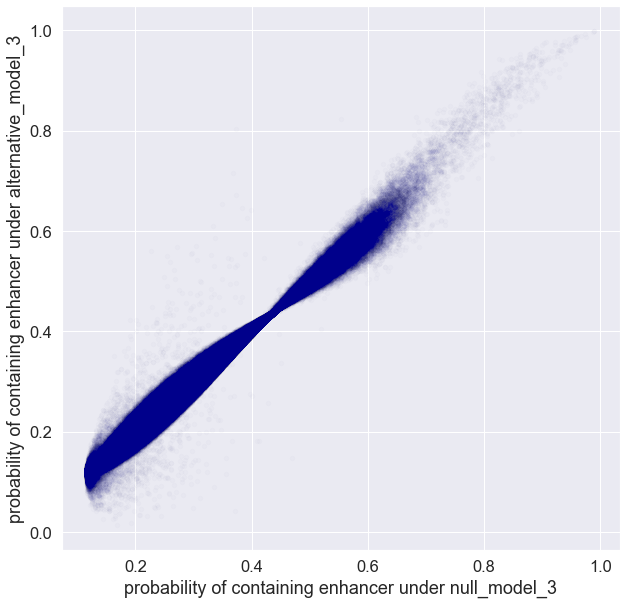

In [47]:
def correlate_probabilities(df, kmer_size):
    fig, axis = plt.subplots(figsize=(10,10))
    df.plot.scatter(
        x=f'probability of containing enhancer under null_model_{kmer_size}',
        y=f'probability of containing enhancer under alternative_model_{kmer_size}',
        c='DarkBlue',
        alpha=0.01,
        ax=axis    
    )

correlate_probabilities(chen_mchale_zscores_features_noncoding, kmer_size=3)

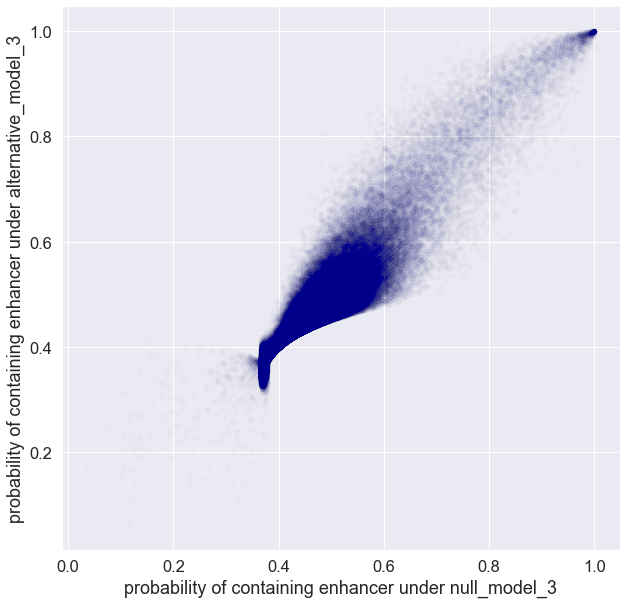

In [48]:
correlate_probabilities(chen_mchale_zscores_features_coding, kmer_size=3)

In [49]:
def compute_array_of_quantiles():
    array_of_quantiles = [0.00, 0.002, 0.005, 0.01, 0.02, 0.05, 0.10, 0.25, 0.5, 0.75, 0.90, 0.95, 0.98, 0.99, 0.995, 0.998, 1.00]

    starts = array_of_quantiles[:-1]
    ends = array_of_quantiles[1:]
    quantile_labels = [f'{start} - {end}' for start, end in zip(starts, ends)]
    
    return array_of_quantiles, quantile_labels

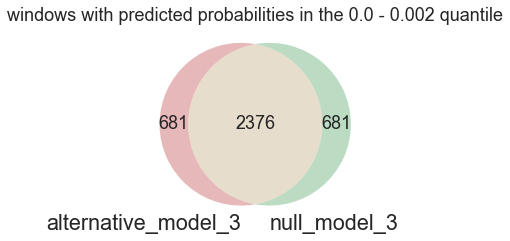

In [50]:
from matplotlib_venn import venn2

def label_windows_with_score_quantiles_core(df, score): 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")        

        array_of_quantiles, quantile_labels = compute_array_of_quantiles()

        df[f'{score} quantile'], bins = pd.qcut(
            df[score],
            q = array_of_quantiles, 
            labels = quantile_labels, 
            retbins = True,
    #         duplicates='drop'
        )

        return df

def label_windows_with_score_quantiles(df, kmer_size):   
    df = label_windows_with_score_quantiles_core(df, score=f'complement of probability of containing enhancer under alternative_model_{kmer_size}')
    df = label_windows_with_score_quantiles_core(df, score=f'complement of probability of containing enhancer under null_model_{kmer_size}')
    return df 

def plot_venn_diagram(df, kmer_size): 
    df = label_windows_with_score_quantiles(df, kmer_size)

    min_quantile = df[f'complement of probability of containing enhancer under null_model_{kmer_size} quantile'].unique().min()

    top_ranked_windows_under_alternative_model = df[df[f'complement of probability of containing enhancer under alternative_model_{kmer_size} quantile'] == min_quantile]
    top_ranked_windows_under_null_model = df[df[f'complement of probability of containing enhancer under null_model_{kmer_size} quantile'] == min_quantile]
    ids_of_top_ranked_windows_under_alternative_model = set(top_ranked_windows_under_alternative_model.index)
    ids_of_top_ranked_windows_under_null_model = set(top_ranked_windows_under_null_model.index)

    plt.figure(figsize=(4,4))
    venn2(
        [
            ids_of_top_ranked_windows_under_alternative_model, 
            ids_of_top_ranked_windows_under_null_model
        ], 
        set_labels = (
            f'alternative_model_{kmer_size}', 
            f'null_model_{kmer_size}'
        )
    )
    plt.title(f'windows with predicted probabilities in the {min_quantile} quantile')
    
plot_venn_diagram(chen_mchale_zscores_features_noncoding, kmer_size=3)

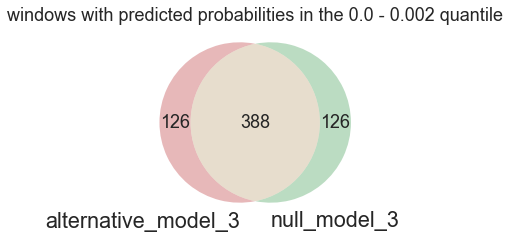

In [51]:
plot_venn_diagram(chen_mchale_zscores_features_coding, kmer_size=3)

## NOTE 
At some point, we might want to estimate the uncertainty in the predicted probabilities reported by the models, see, e.g., https://www.gatsby.ucl.ac.uk/~balaji/balaji-uncertainty-talk-cifar-dlrl.pdf For now, we assume no uncertainty in the predicted probabilities, and use them to rank windows. 

## Windows with extreme values of McHale's N_bar_X are significantly more likely to overlap an enhancer  than windows with similarly extreme values of Chen's zscore 

In [52]:
def compute_fraction_of_windows_that_overlap_enhancer(df): 
    fraction_of_windows_that_overlap_enhancer = np.mean(df['window overlaps enhancer'])
    return fraction_of_windows_that_overlap_enhancer

In [53]:
def compute_enhancerFraction_vs_quantile(df, score): 
    df = label_windows_with_score_quantiles_core(df, score)

    groups = df.groupby([f'{score} quantile'])
    aggregated = groups.agg({
        'window overlaps enhancer': ['mean'],
        score: ['mean', 'std', 'count']
    })
    
    quantiles = np.array(aggregated.index)
    fraction_overlap_enhancer = np.array(aggregated['window overlaps enhancer']).flatten()
    hover_data = aggregated.to_dict(orient='records')

    return quantiles, fraction_overlap_enhancer, hover_data

def create_text(hover_datum, score):
    mean = hover_datum[(score, 'mean')]
    std = hover_datum[(score, 'std')]
    count = hover_datum[(score, 'count')]
    return (
        f'{score} mean: {mean}<br>'
        f'{score} std: {std}<br>' 
        f'number of windows: {count}<br>' 
    )

def plot_enhancerFraction_vs_quantile(df): 
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")    
    
        sns.set(font_scale = 1.6)
        fig = go.Figure()

        for (score, marker) in tqdm([
            ('negative chen zscore', ''),
            ('N_bar_3', 's'),
            ('N_bar_5', 's'),
            ('N_bar_7', 's'),
            ('negative K_bar_3', ''),
            ('negative K_bar_5', ''),
            ('negative K_bar_7', ''),
            ('complement of probability of containing enhancer under alternative_model_3', 'o'), 
            ('complement of probability of containing enhancer under alternative_model_5', 'o'), 
            ('complement of probability of containing enhancer under alternative_model_7', 'o'), 
            ('complement of probability of containing enhancer under null_model_3', ''), 
            ('complement of probability of containing enhancer under null_model_5', ''), 
            ('complement of probability of containing enhancer under null_model_7', ''), 
        ], desc=f'compute_enhancerFraction_vs_quantile'): 
            (
                quantiles, 
                fraction_overlap_enhancer,
                hover_data 
            ) = compute_enhancerFraction_vs_quantile(df, score)
            fig.add_trace(
                go.Scatter(
                    x = quantiles, 
                    y = fraction_overlap_enhancer,
                    mode = 'lines+markers',
                    name = score,
                    hovertemplate = (
                        '%{text}'
                    ),
                    text = [create_text(hover_datum, score) for hover_datum in hover_data],
                )
            )

        fraction_of_windows_that_overlap_enhancer = compute_fraction_of_windows_that_overlap_enhancer(df)
        fig.add_trace(
            go.Scatter(
                x = quantiles, 
                y = [fraction_of_windows_that_overlap_enhancer]*len(quantiles),
                mode = 'lines',
                name = 'fraction of all windows that overlap an enhancer',
            )
        )

        fig.update_xaxes(
            title = 'quantile of window score',
#             type = "log", 
#             exponentformat = 'power'
        )
        fig.update_yaxes(
            title = 'fraction of Chen windows that overlap a GeneHancer enhancer',
            range=None, 
        )    
        fig.update_layout(
            height = 800, 
            width = 1600,
            font = dict(
                size = 20,
            )        
        )
        fig.update_annotations(font_size=24)
        fig.show()
        
plot_enhancerFraction_vs_quantile(chen_mchale_zscores_features_noncoding)

compute_enhancerFraction_vs_quantile: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:03<00:00,  4.12it/s]


compute_OR_vs_quantile: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:07<00:00,  1.60s/it]


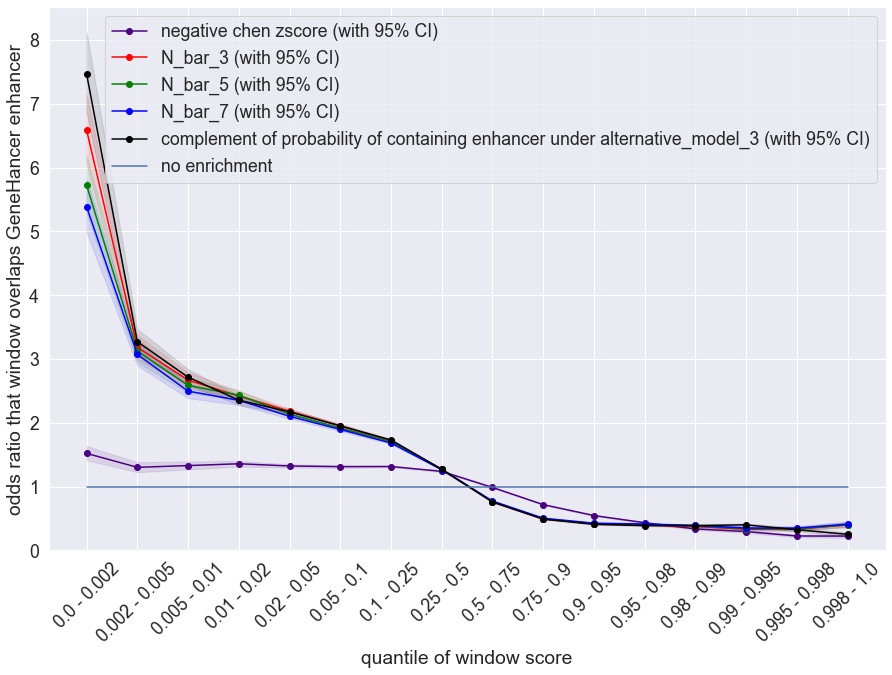

In [54]:
def compute_OR(window_score_is_in_quantile, window_overlaps_enhancer): 
    # contingency table 
    counts_df = pd.crosstab(
        index = window_score_is_in_quantile, 
        columns = window_overlaps_enhancer,
    )
    counts = np.array(counts_df)
    OR_hat = counts[0,0]*counts[1,1]/(counts[0,1]*counts[1,0])

    LOR_hat = np.log(OR_hat)
    LOR_hat_std = np.sqrt(np.sum(1/counts))
    LOR_confidence_interval = LOR_hat + np.array([-1, 1])*1.96*LOR_hat_std # 95% CI 
    
    OR_confidence_interval = np.exp(LOR_confidence_interval)
    ci_lower, ci_upper = OR_confidence_interval[0], OR_confidence_interval[1]

    return OR_hat, ci_lower, ci_upper
  
def compute_OR_vs_quantile(df, score): 
    df = label_windows_with_score_quantiles_core(df, score)

    window_quantiles = df[f'{score} quantile'] 
    window_overlaps_enhancer = df['window overlaps enhancer']
    
    _, quantiles = compute_array_of_quantiles()
    ORs, ci_lowers, ci_uppers = [], [], []
    for quantile in quantiles:
        window_score_is_in_quantile = window_quantiles == quantile 
        OR_hat, ci_lower, ci_upper = compute_OR(window_score_is_in_quantile, window_overlaps_enhancer)
        ORs.append(OR_hat) 
        ci_lowers.append(ci_lower)
        ci_uppers.append(ci_upper)        
    return np.array(quantiles), ORs, ci_lowers, ci_uppers

def plot_OR_vs_quantile(df): 
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")    
    
        sns.set(font_scale = 1.6)
        plt.rcParams["figure.figsize"] = (15, 10)

        for (score, color) in tqdm([
            ('negative chen zscore', 'indigo'),
            ('N_bar_3', 'red'),
            ('N_bar_5', 'green'),
            ('N_bar_7', 'blue'),
            ('complement of probability of containing enhancer under alternative_model_3', 'black'), 
        ], desc='compute_OR_vs_quantile'):
            (
                quantiles, 
                ORs,
                ci_lowers, 
                ci_uppers,
            ) = compute_OR_vs_quantile(df, score)
            plt.plot(
                quantiles, 
                ORs, 
                marker='o', 
                color=color, 
                label=f'{score} (with 95% CI)'
            )
            plt.fill_between(
                quantiles, 
                ci_lowers,
                ci_uppers,
                alpha=0.1, 
                color=color,
            )
            
        plt.plot(
            quantiles,
            [1]*len(quantiles), 
            '-',
            label='no enrichment'
        )
            
        plt.xlabel('quantile of window score')
        plt.xticks(rotation = 45) 

        plt.ylim([0, None])
        plt.ylabel('odds ratio that window overlaps GeneHancer enhancer')        

        plt.legend()
        
plot_OR_vs_quantile(chen_mchale_zscores_features_noncoding)

## When windows overlap exons, those with extreme values of N_bar_X AND K_bar_X (alternative model) are more likely to harbor enhancers than those with extreme values of N_bar_X (without regard to K_bar_X; null model)

In [55]:
plot_enhancerFraction_vs_quantile(chen_mchale_zscores_features_coding)

compute_enhancerFraction_vs_quantile: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 30.99it/s]


compute_OR_vs_quantile: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.32it/s]


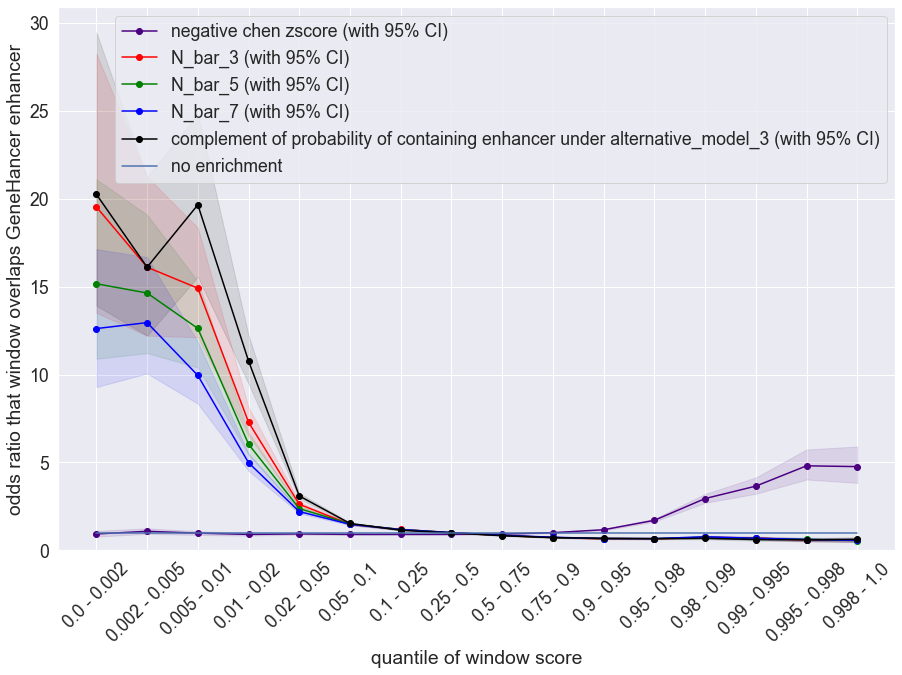

In [56]:
plot_OR_vs_quantile(chen_mchale_zscores_features_coding)

## Not only do extreme values of N_bar_X pull out more enhancers than extreme values of Chen's zscore, but the enhancers are on average longer

In [57]:
def compute_mean_feature_overlap(
    feature_to_stratify_by, 
    y_axis_feature, 
    window_overlaps_stratify_feature
):
    df = filter_df(
        feature_to_stratify_by,
        window_overlaps_stratify_feature
    )
    mean_feature_overlap = np.mean(df[y_axis_feature])
    return mean_feature_overlap

def compute_featureOverlap_vs_quantile(
    feature_to_stratify_by, 
    y_axis_feature, 
    window_overlaps_stratify_feature, 
    score, 
    array_of_quantiles
): 
    df = filter_df(
        feature_to_stratify_by,
        window_overlaps_stratify_feature
    )
    df[f'{score} quantile'], bins = pd.qcut(
        df[score],
        q = array_of_quantiles, 
        labels = False, 
        retbins = True,
#         duplicates='drop'
    )

    groups = df.groupby([f'{score} quantile'])
    aggregated = groups.agg({
        y_axis_feature: ['mean', 'std', 'count'],
        score: ['mean', 'std', 'count']
    })

    quantile_values = np.array(aggregated.index)
    y_axis_feature_value = np.array(aggregated[(y_axis_feature, 'mean')])
    hover_data = aggregated.to_dict(orient='records')
    return quantile_values, y_axis_feature_value, hover_data

def create_text_v2(hover_datum, score, y_axis_feature):
    score_mean = hover_datum[(score, 'mean')]
    score_std = hover_datum[(score, 'std')]
    score_count = hover_datum[(score, 'count')]
    
    y_axis_feature_std = hover_datum[(y_axis_feature, 'std')]
    y_axis_feature_count = hover_datum[(y_axis_feature, 'count')]
    
    return (
        f'{score} mean: {score_mean}<br>'
        f'{score} std: {score_std}<br>' 
        f'{score} count: {score_count}<br>' 
        f'{y_axis_feature} std: {y_axis_feature_std}<br>' 
        f'{y_axis_feature} count: {y_axis_feature_count}<br>' 
    )

def plot_featureOverlap_vs_quantile(
    feature_to_stratify_by, 
    y_axis_feature, 
    window_overlaps_stratify_feature, 
    array_of_quantiles, 
    quantile_labels,
    fig, 
    row,  
    col
): 
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")    
    
        for (score, color) in tqdm([
            ('negative chen zscore', 'indigo'),
            ('N_bar_3', 'red'),
            ('N_bar_5', 'green'),
            ('N_bar_7', 'blue'),
#             ('complement of probability of containing enhancer under alternative_model_3', 'black'), 
        ], desc=f'plot_featureOverlap_vs_quantile (row={row}, col={col})'): 
            (
                quantile_values, 
                y_axis_feature_value,
                hover_data 
            ) = compute_featureOverlap_vs_quantile(
                feature_to_stratify_by, 
                y_axis_feature, 
                window_overlaps_stratify_feature, 
                score, 
                array_of_quantiles
            )
            fig.add_trace(
                go.Scatter(
                    x = quantile_values, 
                    y = y_axis_feature_value,
                    mode = 'lines',
                    name = score,
                    hovertemplate = (
                        '%{text}'
                    ),
                    line = dict(color=color),
                    text = [
                        create_text_v2(
                            hover_datum, 
                            score, 
                            y_axis_feature
                        ) for hover_datum in hover_data
                    ],
                    showlegend = True if (row == 1 and col == 1) else False
                ),
                row = row, 
                col = col,
            )

        mean_feature_overlap = compute_mean_feature_overlap(
            feature_to_stratify_by, 
            y_axis_feature, 
            window_overlaps_stratify_feature
        )        
        fig.add_trace(
            go.Scatter(
                x = [min(quantile_values), max(quantile_values)], 
                y = [mean_feature_overlap, mean_feature_overlap],
                mode = 'lines',
                line = dict(color='black'),
                name = f'mean {y_axis_feature}',
                showlegend = True if (row == 1 and col == 1) else False
            ),
            row = row, 
            col = col,
        )
            
        fig.update_xaxes(
            title = 'quantile of window score',
            tickmode = 'array',
            tickvals = quantile_values,
            ticktext = quantile_labels,
            tickangle = 45,
            row = row, 
            col = col,
        )
        fig.update_yaxes(
            title = f'mean<br>{y_axis_feature}<br>(bps)',
            range = [550, 950] if y_axis_feature == 'enhancer overlap' else [200, 700],
            row = row, 
            col = col,
        )    
    
def plot_featureOverlap_vs_quantile_all(): 
    plot_args = [
        (i, j, feature_to_stratify_by, y_axis_feature, window_overlaps_stratify_feature)
        for i, window_overlaps_stratify_feature in enumerate([False, True])        
        for j, (feature_to_stratify_by, y_axis_feature) in enumerate([
            ('window overlaps merged_exon', 'enhancer overlap'),
            ('window overlaps enhancer', 'merged_exon overlap'),                
        ])
    ]       
    array_of_quantiles, quantile_labels = compute_array_of_quantiles()
    plot_args = [t + (array_of_quantiles,) for t in plot_args]
    
    fig = make_subplots(
        rows = 2, 
        cols = 2,
        shared_xaxes = False, 
        shared_yaxes = False,  
#         x_title = 'XXX', 
#         y_title = 'YYY',
        subplot_titles = [
            (
#                 f'i: {i}<br>'
#                 f'j: {j}<br>'
                f'{feature_to_stratify_by}: {window_overlaps_stratify_feature}<br>' 
#                 f'y_axis_feature: {y_axis_feature}' 
            )
            for (i, j, feature_to_stratify_by, y_axis_feature, window_overlaps_stratify_feature, array_of_quantiles) in plot_args
        ],
        vertical_spacing = 0.3,
        horizontal_spacing = 0.2
    )

    for (i, j, feature_to_stratify_by, y_axis_feature, window_overlaps_stratify_feature, array_of_quantiles) in plot_args: 
        plot_featureOverlap_vs_quantile(
            feature_to_stratify_by,
            y_axis_feature,
            window_overlaps_stratify_feature,
            array_of_quantiles,
            quantile_labels,
            fig = fig, 
            row = i + 1, 
            col = j + 1
        )

    fig.update_layout(
        height = 1000, 
        width = 1800,
        font = dict(
            size = 20,
        )        
    )
    fig.update_annotations(font_size=24)
    fig.show()    
    
plot_featureOverlap_vs_quantile_all()

plot_featureOverlap_vs_quantile (row=2, col=2): 100%|█████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.87it/s]


## Save data to disk

In [65]:
chen_mchale_zscores_features.iloc[:,:18].to_csv(
    f'{CONSTRAINT_TOOLS_DATA}/benchmark-genome-wide-predictions/chen-et-al-2022/chen-mchale.multiple-kmers.enhancer-exon.bed', 
    sep = '\t',
    index = False
)

## TODO: Hypotheses to pursue

In [75]:
# TODO: determine if enhancers captured by only one method correspond to 
# genomic regions with characteristic feature set:

# Hypothesis 1: enhancers captured by Chen only have heterogenous methylation levels that affect SNV density, 
# independent of natural selection, 
# whereas enhancers captured by McHale only have methylation levels that don't affect SNV density

# Hypothesis 2: enhancers captured by McHale only have high SNV density 